<a href="https://colab.research.google.com/github/bolps/vdm2020/blob/master/Progetto_VDM_Sport_e_alimentazione.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Consegna e link utili

**Consegna del progetto:**

1. Costruzione del sottoinsieme dei dati che contenga le informazioni assegnate al gruppo;
2. Analisi monovariata e visualizzazione monovariata dei dati del proprio dataset;
3. Analisi bivariata e visualizzazione dei dati piu’ interessanti ai fini degli obiettivi di ricerca;
4. Analisi multivariata e visualizzazione dei dati complessi.

**Link utili** <br>
http://www.sthda.com/english/articles/31-principal-component-methods-in-r-practical-guide/114-mca-multiple-correspondence-analysis-in-r-essentials/ <br>
http://www.gastonsanchez.com/visually-enforced/how-to/2012/10/13/MCA-in-R/ <br>
https://datascienceplus.com/using-mca-and-variable-clustering-in-r-for-insights-in-customer-attrition/ <br>
https://datascienceplus.com/using-mca-and-variable-clustering-in-r-for-insights-in-customer-attrition/

#### **TODO**
- [x] Rifare bivariate con nuove variabili
- [x] Togliere SPRIV e REGMF
- [x] Bozza multivariate
- [x] Fix visalizzazione warning in output su github
- [ ] Bozza commenti scelte fatte (processo) *fuffa*
- [ ] Bozza risultati(processo) *fuffa*
- [x] Valutare possibile ricodifica di FREQSPO e ISTRMi
- [ ] ggplot su pie ... portare fuori le etichette
- [ ] Aggiornare tutti i mosaic con N
- [x] Aggiungere n a mosiaci, si può? e si legge?
- [x] Quando nel table c'è inferiroe a 5 esiste un altro test? (bivariate risec). Si, Fisher's exact test
- [ ] **Importante** Inserire ordered factor
- [ ] Grafico cos2 corrispondenza
- [ ] Approfondire analisi corrispondenza
- [ ] funzione GGMCA
- [ ] funzione GGBARCHART
- [ ] funzione CPIE

Abstract
<br>
Introduzione
<br>
Domanda di ricerca
<br>
Dataset e metodi
<br>
Presentazione analisi mono
<br>
Presentazione analisi e risultati bivariate
<br>
Presentazione analisi multivariate e risultati
<br>
Conclusione



#### Contesto e domanda di ricerca

**Domanda di ricerca** <br>

Indagare il legame tra le abitudini sportive, le risorse economiche, l'area geografica e gli indici di salute oggettivi (*Body Mass Index*) e soggettivi (*Salute percepita*) nei 18-35enni residenti in italia, con un focus particolare sul genere.
<br><br>
**Informazioni sulle variabili e sulla codifica**<br>
Per informazioni sulle variabili e sulla loro codifica consultare il tracciato disponibile
<a href="http://pizzaplanet.epizy.com/vdm/METADATI/AVQ_Tracciato_2018.html"> qui </a>

#### Installazione librerie

In [ ]:
options(warn=-1)

In [ ]:
# TEMPO DI INSTALLAZIONE STIMATO: 4 MINUTI
list.of.packages <- c("RCurl","readr","ggplot2", "RColorBrewer","graphics","vcd","FactoMineR","factoextra")
new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)) install.packages(new.packages)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘zip’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘data.table’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘corrplot’, ‘zoo’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘viridis’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘bitops’, ‘lmtest’, ‘car’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggrepel’, ‘abind’, ‘dendextend’, ‘ggpubr’, ‘reshape2’




#### Download e caricamento del dataset

In [ ]:
library(RCurl)
download.file("https://raw.githubusercontent.com/bolps/dataset/master/AVQ_Microdati_2018.txt", "AVQ_Microdati_2018.txt")

In [ ]:
library(readr)
AVQ_Microdati_2018 <- read_delim(
  "AVQ_Microdati_2018.txt",
  "\t",
  escape_double=FALSE,
  na="NA",
  trim_ws=TRUE,
  col_types = cols(
    'REACQ3'=col_double(),'REACQ5'=col_double(),
    'NODELE'=col_double(),'NOSPO6'=col_double(),
    'ORARIS'=col_double(),'NOMED' =col_double(),
    'CONASS'=col_double(),'MALAT' =col_double(),
    'ABBAND'=col_double(),'NONVUO'=col_double()
  )
)

##### Estrazione delle varabili, ricodifica e fix vari


In [ ]:
AVQ18.sport <- AVQ_Microdati_2018[AVQ_Microdati_2018$ETAMi>='007'&AVQ_Microdati_2018$ETAMi<='009',c(
  'ETAMi','SESSO','CITTMi','STCIVMi','ISTRMi','CONDMi','RISEC', 'REGMF', 'RIPMF',
  'SPOCON', 'SPOSAL', 'ATTFIS','FREQSPO', 'SPRIV', #spocon, sposal, attfis -> sport
  'AMBIENTE','TEMLIB','SALUT','BMI')]

In [ ]:
# Verifico la struttura del dataset selezionato
str(AVQ18.sport)

tibble [7,372 × 18] (S3: tbl_df/tbl/data.frame)
 $ ETAMi   : chr [1:7372] "008" "009" "008" "008" ...
 $ SESSO   : num [1:7372] 1 2 1 2 2 2 1 1 2 2 ...
 $ CITTMi  : num [1:7372] 1 1 1 1 1 1 3 1 1 1 ...
 $ STCIVMi : num [1:7372] 1 1 1 1 1 1 1 1 1 1 ...
 $ ISTRMi  : chr [1:7372] "07" "01" "07" "01" ...
 $ CONDMi  : num [1:7372] 2 1 1 1 1 3 1 1 3 3 ...
 $ RISEC   : num [1:7372] 2 2 2 2 2 3 2 2 3 3 ...
 $ REGMF   : chr [1:7372] "070" "070" "070" "070" ...
 $ RIPMF   : num [1:7372] 1 1 1 1 1 1 3 3 3 3 ...
 $ SPOCON  : num [1:7372] 1 2 2 2 1 1 1 2 1 2 ...
 $ SPOSAL  : num [1:7372] 1 NA NA NA 2 1 1 NA 1 NA ...
 $ ATTFIS  : num [1:7372] 1 NA NA NA NA 2 3 NA 1 NA ...
 $ FREQSPO : num [1:7372] NA 3 1 2 3 NA NA 4 NA NA ...
 $ SPRIV   : num [1:7372] NA 1 1 2 2 NA NA 1 NA 1 ...
 $ AMBIENTE: num [1:7372] 3 2 2 2 3 3 2 3 1 1 ...
 $ TEMLIB  : num [1:7372] 3 1 2 2 2 3 2 1 2 2 ...
 $ SALUT   : num [1:7372] 3 1 2 1 2 3 2 2 2 2 ...
 $ BMI     : num [1:7372] 2 2 2 2 1 2 2 2 2 2 ...


In [ ]:
# Trasformo la tipologia delle variabili in linea con quanto indicato nel tracciato
for (i in 1:length(AVQ18.sport))
  AVQ18.sport[[i]]<-as.factor(AVQ18.sport[[i]])

In [ ]:
# Assegno l'etichetta corrispondente ai livelli delle variabili
# Per uniformare il dataset l'opzione 'non disponibile' è stata ricodificata come NA

levels(AVQ18.sport$ETAMi) <- c(
    "18-19 anni", 
    "20-24 anni", 
    "25-34 anni"
)

levels(AVQ18.sport$SESSO) <- c(
    "maschio",
    "femmina"
)

levels(AVQ18.sport$CITTMi) <- c(
    "italiana",
    "straniera",
    NA
)

levels(AVQ18.sport$STCIVMi) <- c(
    "celibe/nubile",
    "coniugato/unito civilmente",
    "separato/divorziato",
    "vedovo",
    NA
)

levels(AVQ18.sport$ISTRMi) <- c(
    "laurea e post-laurea"
    ,"diploma"
    ,"scuola media/elementare/nessuno"
    ,"scuola media/elementare/nessuno",
    NA
)

levels(AVQ18.sport$CONDMi) <- c(
    "occupato",
    "in cerca di occupazione",
    "inattivo; altra condizione",
    NA
)

levels(AVQ18.sport$RISEC) <- c(
    "ottime",
    "adeguate",
    "scarse",
    "assolutamente insufficienti"
)

# Per pulire i livelli della variabile e eliminare ridondanza con la variabile RIPMF, "Nord-ovest", "Nord-est", "Centro", "Sud", "Isole" sono state ricodificate come NA
levels(AVQ18.sport$REGMF) <- c(
    "Piemonte",
    "Valle d'Aosta",
    "Lombardia",
    "Trentino-Alto Adige",
    "Veneto",
    "Friuli-Venezia Giulia",
    "Liguria",
    "Emilia-Romagna",
    "Toscana",
    "Umbria",
    "Marche",
    "Lazio",
    "Abruzzo", 
    "Molise", 
    "Campania", 
    "Puglia", 
    "Basilicata", 
    "Calabria", 
    "Sicilia", 
    "Sardegna", 
    NA, 
    NA, 
    NA, 
    NA, 
    NA, 
    NA
)

levels(AVQ18.sport$RIPMF) <- c(
    "Nord-ovest",
    "Nord-est",
    "Centro",
    "Sud",
    "Isole",
    NA
)

for (i in c("SPOCON", "SPOSAL"))
    levels(AVQ18.sport[[i]])<- c(
      "no", 
      "si"
    )

levels(AVQ18.sport$ATTFIS) <- c(
    "no",
    "si, una o più volte a settimana",
    "si, una o più volte al mese",
    "si, più raramente"
)

levels(AVQ18.sport$FREQSPO) <- c(
    "alta",
    "alta",
    "media",
    "media",
    "bassa",
    "bassa",
    "bassa"
)

levels(AVQ18.sport$AMBIENTE) <- c(
    "molto",
    "abbastanza",
    "poco",
    "per niente"
)

levels(AVQ18.sport$SPRIV) <- c(
    "no",
    "si"
)

for (i in c("AMBIENTE", "TEMLIB"))
    levels(AVQ18.sport[[i]])<- c(
        "molto",
        "abbastanza",
        "poco",
        "per niente"
    )

levels(AVQ18.sport$SALUT) <- c(
    "molto", 
    "abbastanza", 
    "poco/per niente", 
    "poco/per niente"
)

levels(AVQ18.sport$BMI) <- c(
    "sottopeso", 
    "normopeso", 
    "sovrappeso", 
    "obeso"
)

In [ ]:
AVQ18.sport$SPORT <- ifelse(AVQ18.sport$SPOCON=="si", "sport continuativo", 
                             ifelse(AVQ18.sport$SPOSAL=="si", "sport saltuario", 
                               ifelse(AVQ18.sport$ATTFIS=="si, una o più volte a settimana", "attività fisica continuativa",
                                 ifelse(AVQ18.sport$ATTFIS=="si, una o più volte al mese" | AVQ18.sport$ATTFIS=="si, più raramente", "attività fisica saltuaria", 
                                    ifelse(AVQ18.sport$ATTFIS=="no", "nessuna attività", NA)))))
                                    
AVQ18.sport$SPORT <- as.factor(AVQ18.sport$SPORT)
AVQ18.sport$SPORT <- factor(AVQ18.sport$SPORT,levels(AVQ18.sport$SPORT)[c(4,5,1,2,3)])

In [ ]:
AVQ18.sport <- AVQ18.sport[,c(
  'ETAMi','SESSO','CITTMi','STCIVMi','ISTRMi','CONDMi','RISEC', 'RIPMF',
  'SPORT','FREQSPO',
  'SALUT','BMI')]

In [ ]:
# Visualizzo la struttura del dataset per verificare le modifiche applicate
str(AVQ18.sport)

tibble [7,372 × 12] (S3: tbl_df/tbl/data.frame)
 $ ETAMi  : Factor w/ 3 levels "18-19 anni","20-24 anni",..: 2 3 2 2 3 1 2 3 3 3 ...
 $ SESSO  : Factor w/ 2 levels "maschio","femmina": 1 2 1 2 2 2 1 1 2 2 ...
 $ CITTMi : Factor w/ 2 levels "italiana","straniera": 1 1 1 1 1 1 2 1 1 1 ...
 $ STCIVMi: Factor w/ 4 levels "celibe/nubile",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ ISTRMi : Factor w/ 3 levels "laurea e post-laurea",..: 2 1 2 1 1 2 2 1 2 2 ...
 $ CONDMi : Factor w/ 3 levels "occupato","in cerca di occupazione",..: 2 1 1 1 1 3 1 1 3 3 ...
 $ RISEC  : Factor w/ 4 levels "ottime","adeguate",..: 2 2 2 2 2 3 2 2 3 3 ...
 $ RIPMF  : Factor w/ 5 levels "Nord-ovest","Nord-est",..: 1 1 1 1 1 1 3 3 3 3 ...
 $ SPORT  : Factor w/ 5 levels "sport continuativo",..: 5 1 1 1 2 3 4 1 5 1 ...
 $ FREQSPO: Factor w/ 3 levels "alta","media",..: NA 2 1 1 2 NA NA 2 NA NA ...
 $ SALUT  : Factor w/ 3 levels "molto","abbastanza",..: 3 1 2 1 2 3 2 2 2 2 ...
 $ BMI    : Factor w/ 4 levels "sottopeso","normopeso",..:

#### Analisi monovariata // Summary per macrocategoria di variabili

In [ ]:
# Visualizzo summary delle variabili socio-demografiche
summary(AVQ18.sport[,c('ETAMi','SESSO','CITTMi','STCIVMi','ISTRMi','CONDMi','RISEC', 'RIPMF')])

        ETAMi          SESSO            CITTMi    
 18-19 anni: 811   maschio:3716   italiana :6758  
 20-24 anni:2056   femmina:3656   straniera: 428  
 25-34 anni:4505                  NA's     : 186  
                                                  
                                                  
                                                  
                       STCIVMi                                 ISTRMi    
 celibe/nubile             :5960   laurea e post-laurea           :1595  
 coniugato/unito civilmente:1112   diploma                        :4026  
 separato/divorziato       : 128   scuola media/elementare/nessuno:1553  
 vedovo                    : 172   NA's                           : 198  
                                                                         
                                                                         
                        CONDMi                             RISEC     
 occupato                  :3489   ottime              

In [ ]:
# Visualizzo il summary delle variabili relative allo sport e all'attività fisica
summary(AVQ18.sport[,c('SPORT','FREQSPO')])

                          SPORT       FREQSPO    
 sport continuativo          :2740   alta :1364  
 sport saltuario             :1074   media:1882  
 attività fisica continuativa: 883   bassa: 564  
 attività fisica saltuaria   :1056   NA's :3562  
 nessuna attività            :1528               
 NA's                        :  91               

In [ ]:
# Visualizzo il summary relativo a BMI, stato di salute percepita e soddisfazione per il tempo libero
summary(AVQ18.sport[,c('SALUT','BMI')])

             SALUT              BMI      
 molto          :2091   sottopeso : 518  
 abbastanza     :4682   normopeso :4941  
 poco/per niente: 496   sovrappeso:1574  
 NA's           : 103   obeso     : 339  

#### Analisi monovariata // Variabili socio-demografiche



In [ ]:
library(RColorBrewer)
library(ggplot2)
library(grid)

In [ ]:
# Definisco funzione per pie chart
pc <- function(df, title, palname, ncol, rev=c('TRUE','FALSE')){
  pct<-round(table(df)/length(df)*100, 2)
  lbls<-levels(df)
  lbls2<-paste(lbls, " ",pct, "%", sep="")
  if(rev==FALSE){
    pie(pct, labels=lbls2, main=title, border="white", col=brewer.pal(ncol, palname))}
    else{
      pie(pct, labels=lbls2, main=title, border="white", col=rev(brewer.pal(ncol, palname)))
    }
}

# Definisco funzione per barchart
bc <- function(df, title, subtitle, palname, direct=c(-1,1)){
  data <- data.frame("class" = levels(df),"values" =as.vector(table(df)))
  data$class <- factor(data$class, levels = data[["class"]])
  ggplot(data, aes(x=class, y=values, fill=class))+
  geom_bar(stat="identity")+
  theme_bw()+
  theme(axis.text.x = element_text(angle = 45, hjust = 1),panel.grid=element_blank(),panel.border = element_blank(),axis.line = element_line(colour = "black"))+
  labs(title = title, subtitle = subtitle, y = "frequenza assoluta", x="", fill = "")+
  scale_fill_brewer(palette=palname, direction=direct)
}

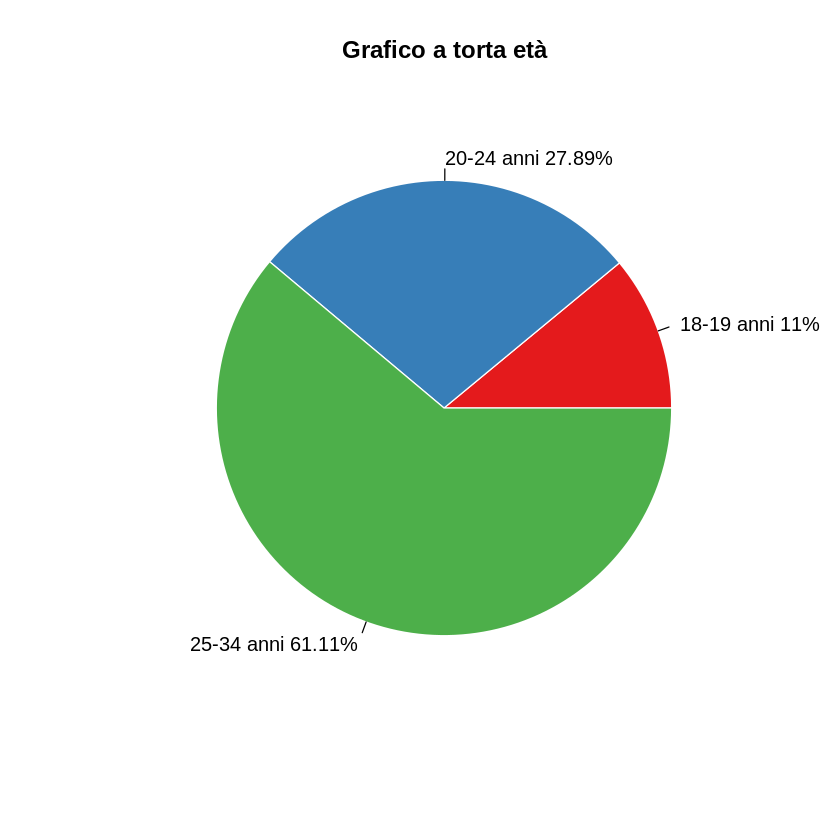

In [ ]:
pc(AVQ18.sport$ETAMi,"Grafico a torta età","Set1",3,FALSE)

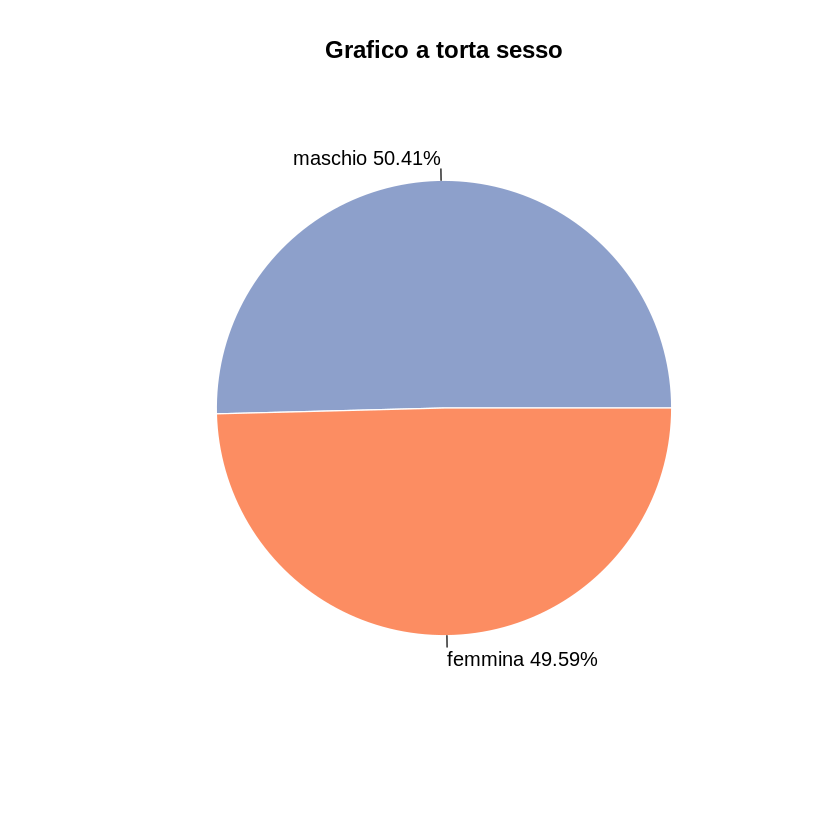

In [ ]:
pc(AVQ18.sport$SESSO,"Grafico a torta sesso","Set2",1,TRUE)

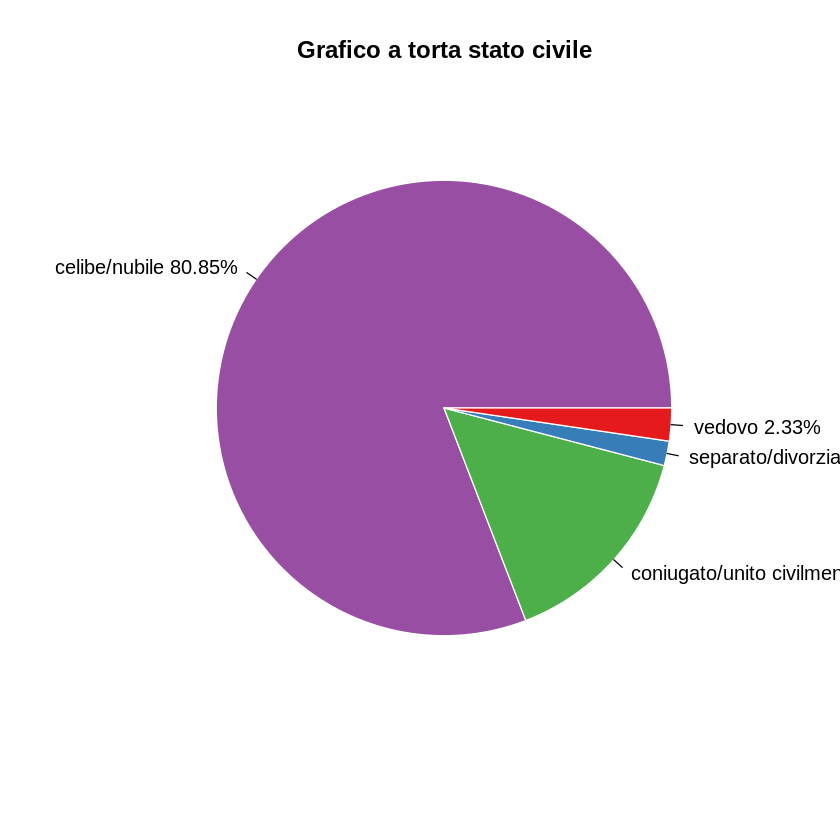

In [ ]:
pc(AVQ18.sport$STCIVMi,"Grafico a torta stato civile","Set1",4,TRUE)

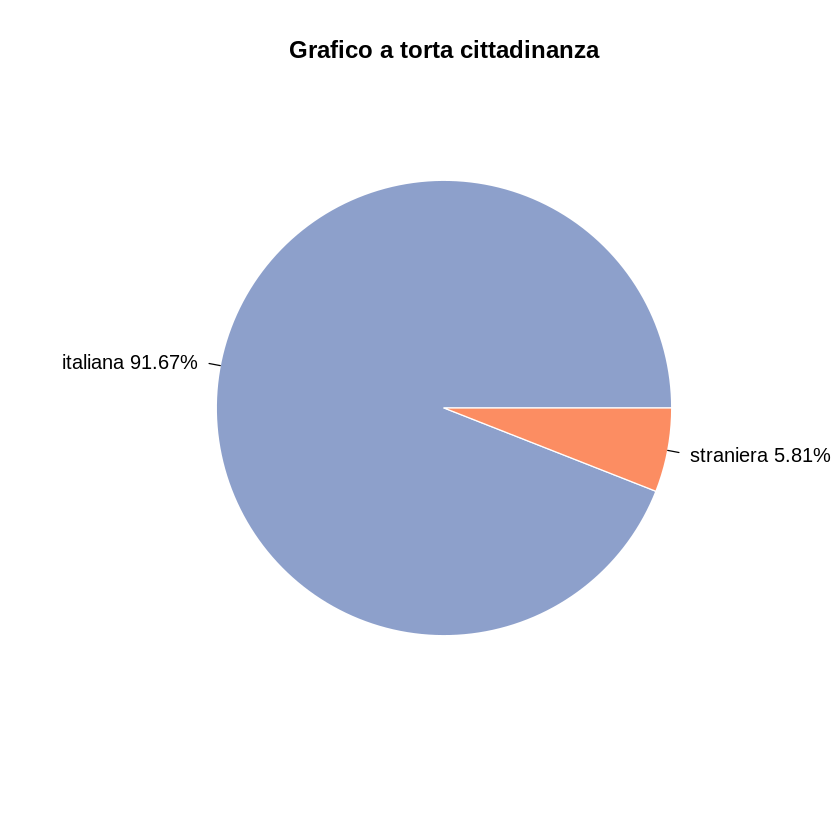

In [ ]:
pc(AVQ18.sport$CITTMi,"Grafico a torta cittadinanza","Set2",2,TRUE)

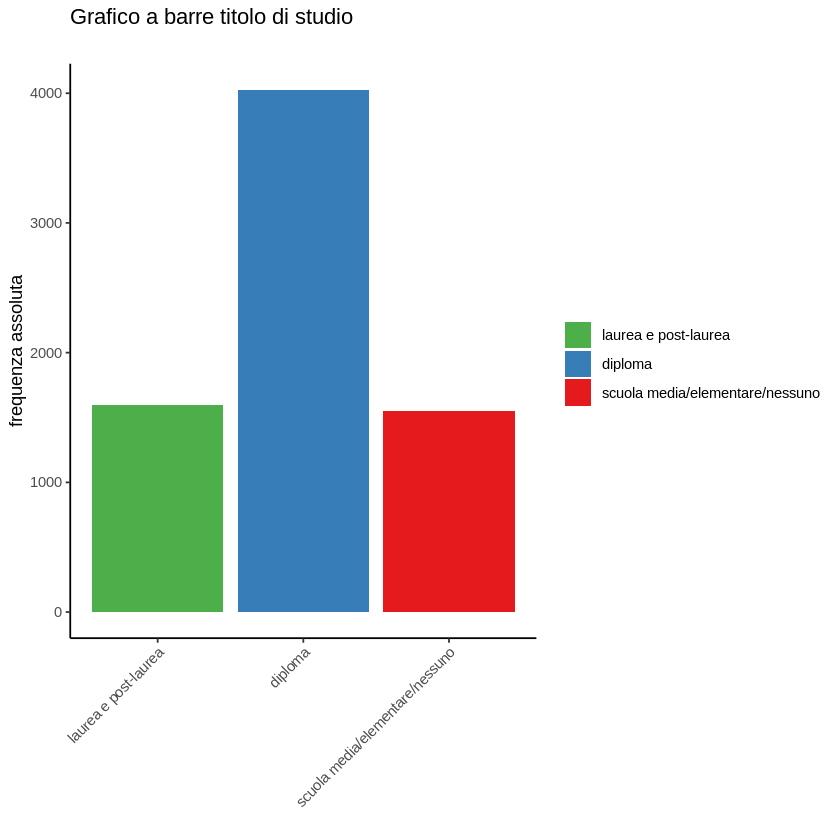

In [ ]:
bc(AVQ18.sport$ISTRMi,"Grafico a barre titolo di studio","","Set1",-1)

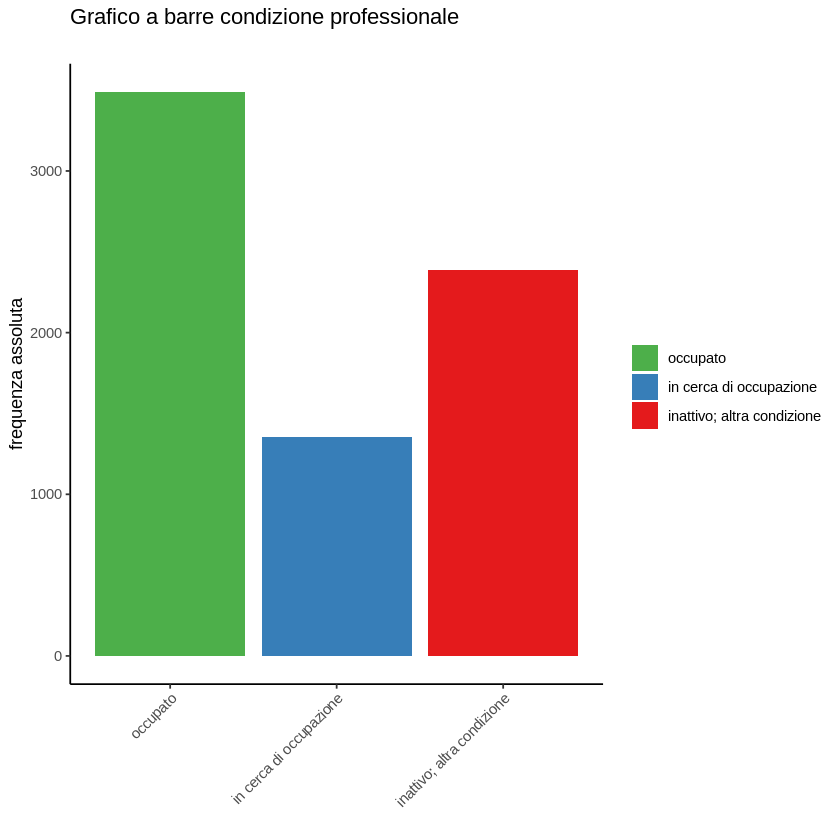

In [ ]:
bc(AVQ18.sport$CONDMi,"Grafico a barre condizione professionale","","Set1",-1)

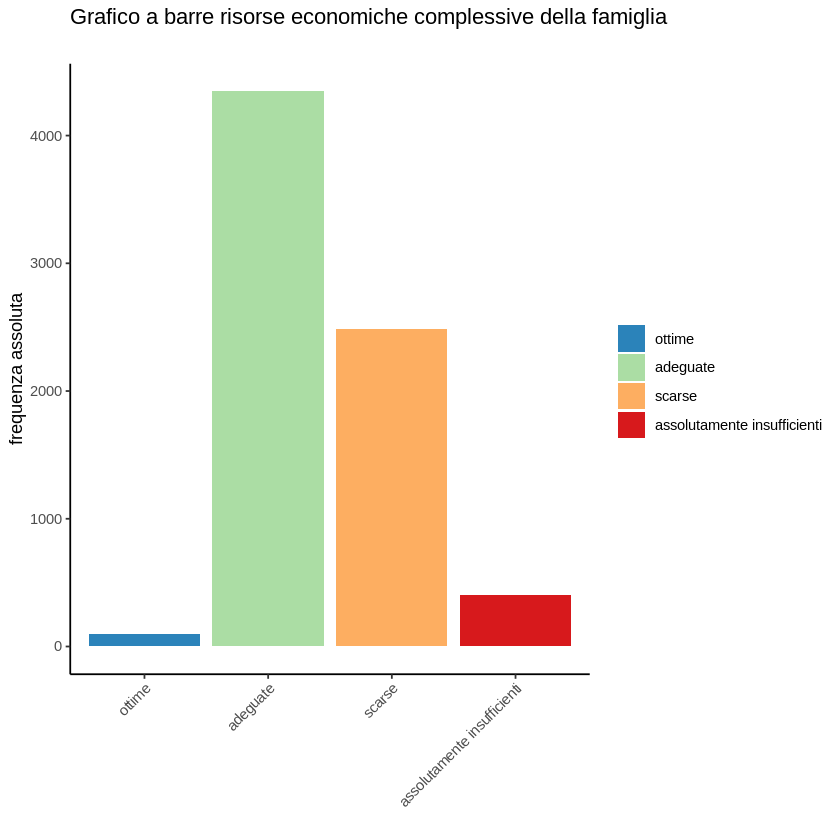

In [ ]:
bc(AVQ18.sport$RISEC,"Grafico a barre risorse economiche complessive della famiglia","","Spectral",-1)

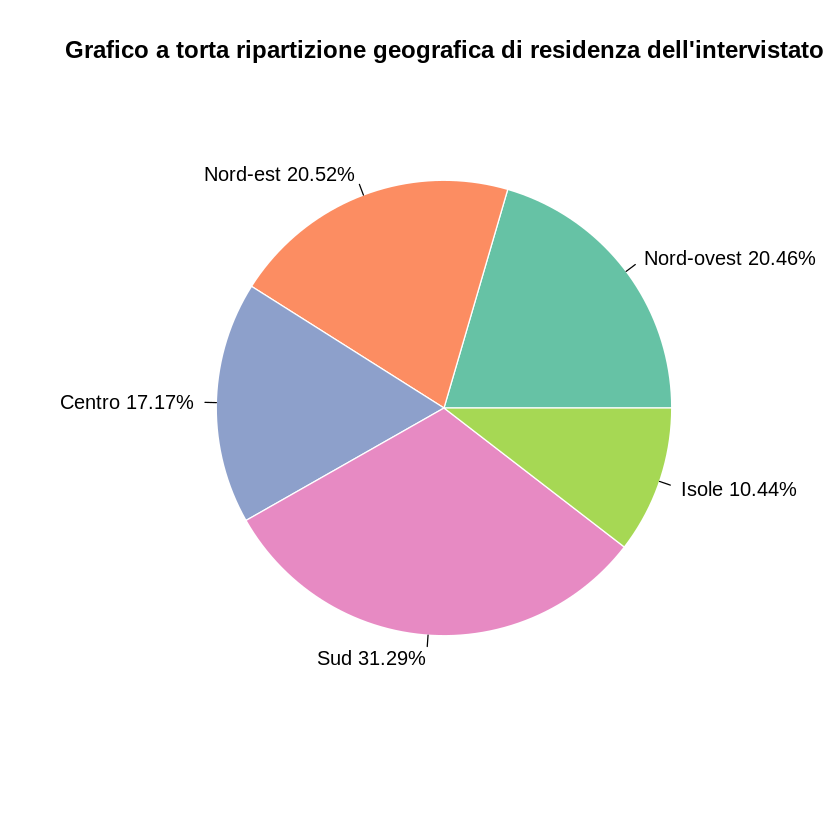

In [ ]:
pc(AVQ18.sport$RIPMF,"Grafico a torta ripartizione geografica di residenza dell'intervistato","Set2",6,FALSE)

#### Analisi monovariata // Variabili sport e attività fisica

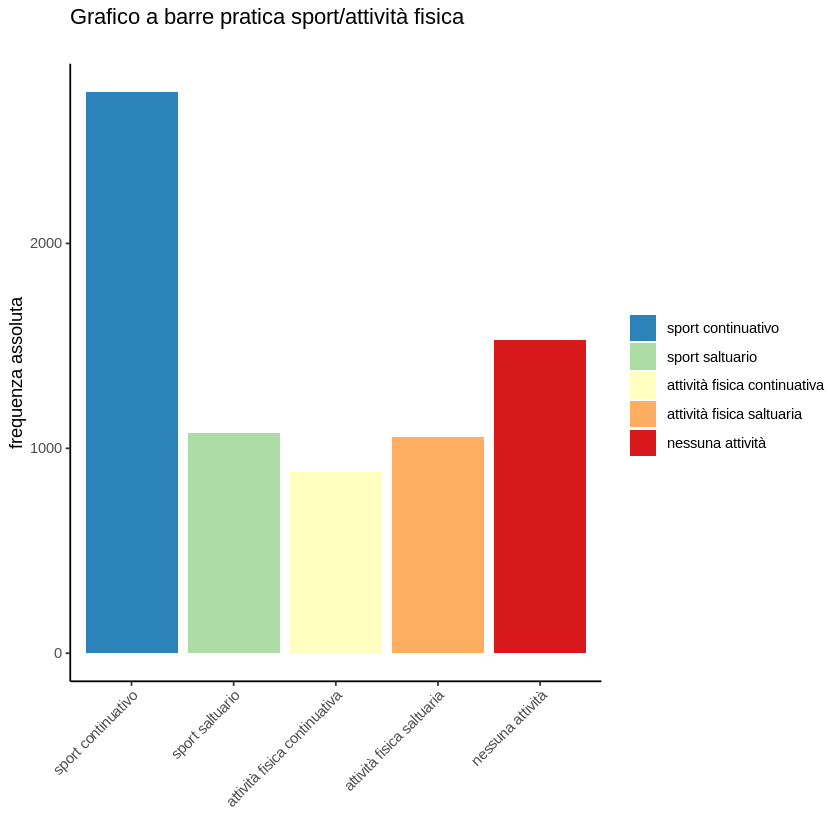

In [ ]:
bc(AVQ18.sport$SPORT,"Grafico a barre pratica sport/attività fisica","","Spectral",-1)

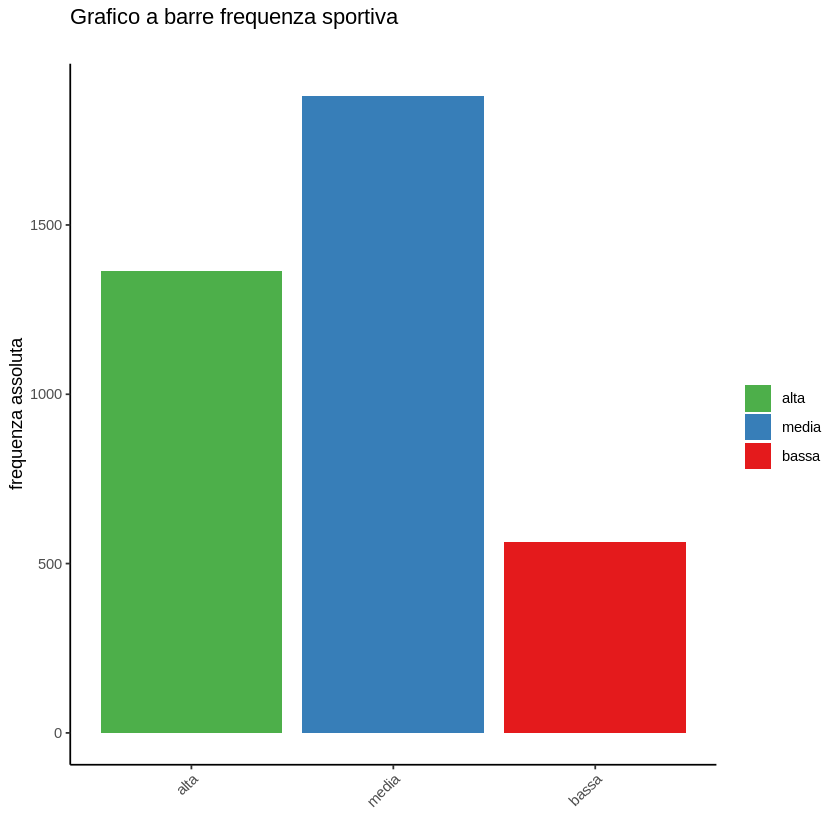

In [ ]:
bc(AVQ18.sport$FREQSPO,"Grafico a barre frequenza sportiva","","Set1",-1)

#### Analisi monovariata // Variabili BMI, salute percepita e soddisfazione per il tempo libero

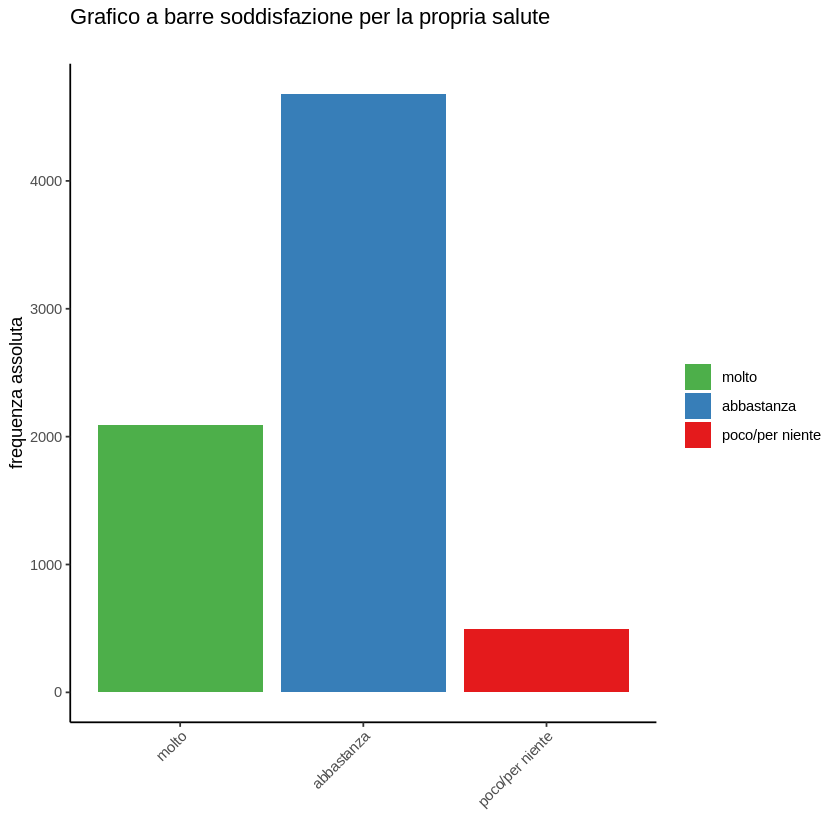

In [ ]:
bc(AVQ18.sport$SALUT,"Grafico a barre soddisfazione per la propria salute","","Set1",-1)

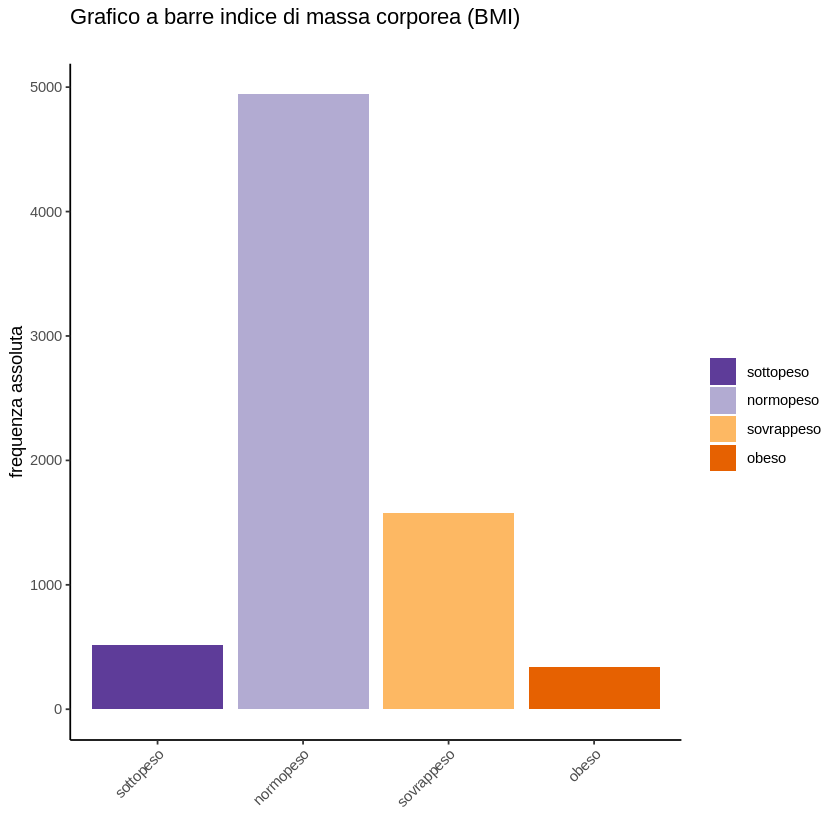

In [ ]:
bc(AVQ18.sport$BMI,"Grafico a barre indice di massa corporea (BMI)","","PuOr",-1)

#### Bivariata // Focus Sport

In [ ]:
library(vcd)

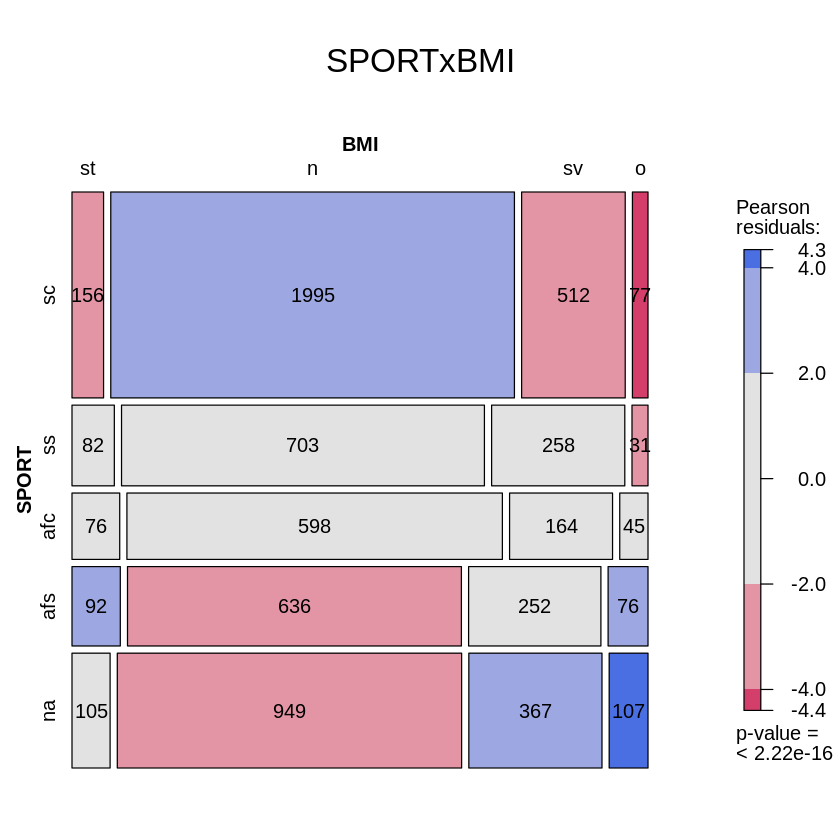

In [ ]:
mosaic(~ SPORT + BMI, data = AVQ18.sport, main = "SPORTxBMI", shade = TRUE, legend = TRUE,abbreviate_labs = T, labeling = labeling_values)

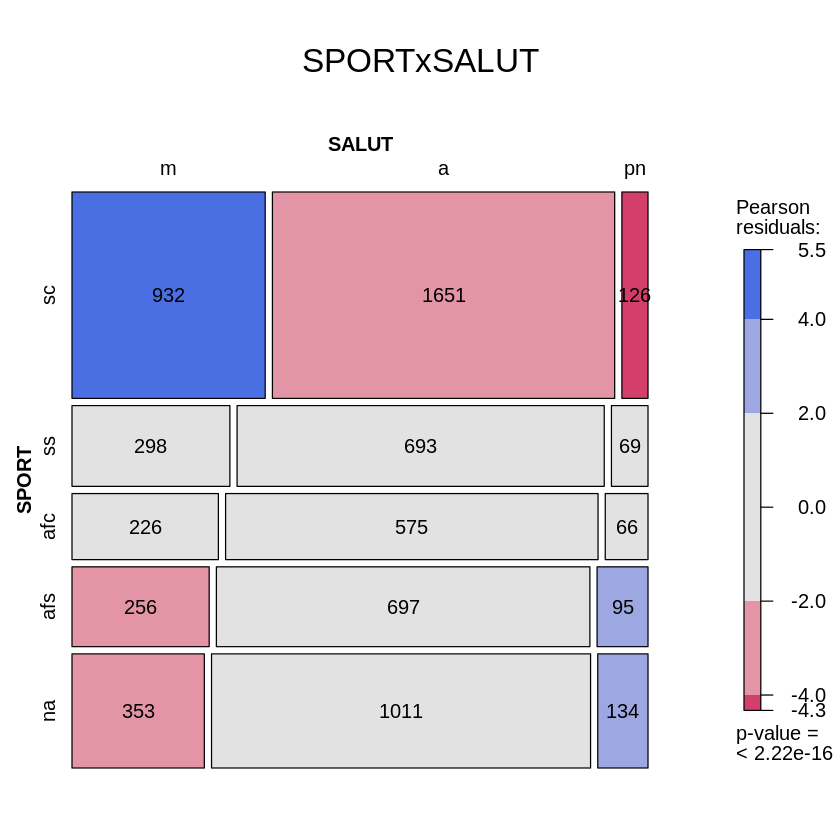

In [ ]:
mosaic(~ SPORT + SALUT, data = AVQ18.sport, main = "SPORTxSALUT", shade = TRUE, legend = TRUE,abbreviate_labs = T, labeling = labeling_values)

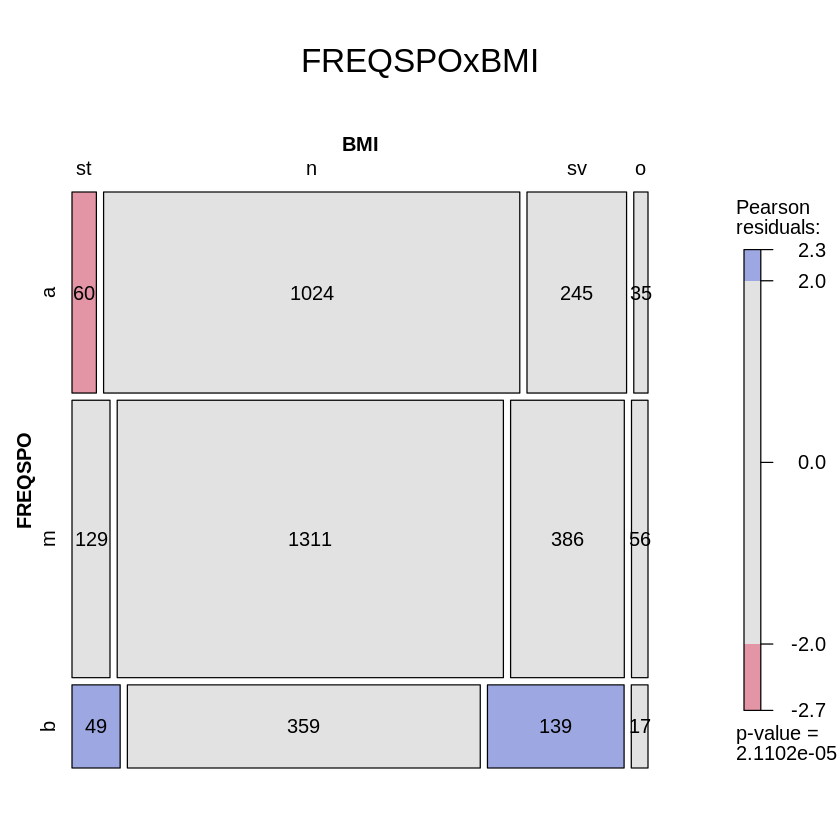

In [ ]:
mosaic(~ FREQSPO + BMI, data = AVQ18.sport, main = "FREQSPOxBMI", shade = TRUE, legend = TRUE,abbreviate_labs = T, labeling = labeling_values)

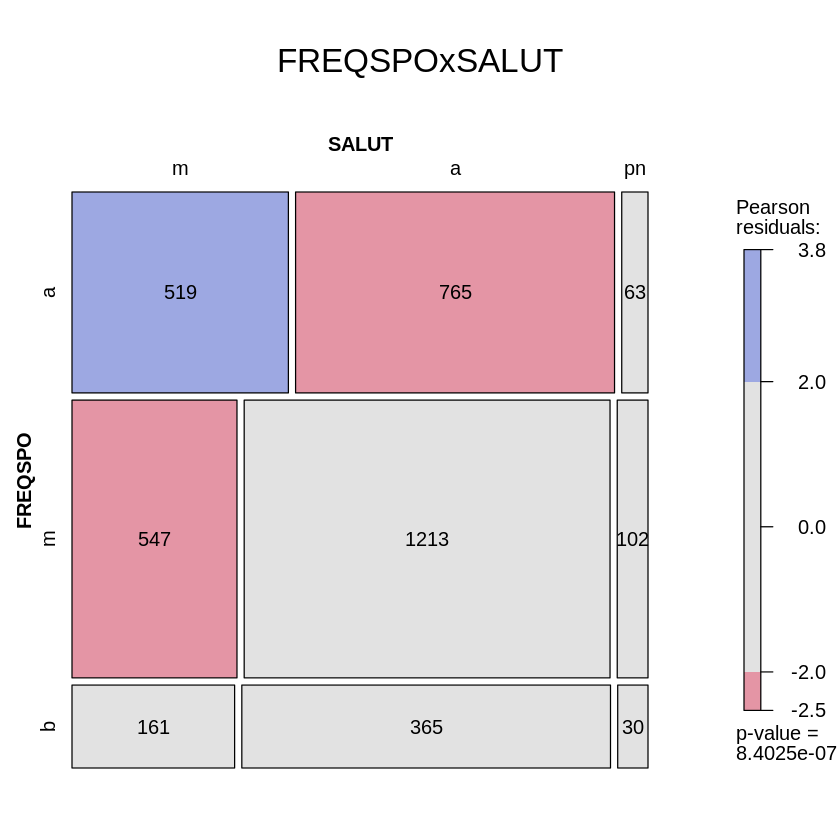

In [ ]:
mosaic(~ FREQSPO + SALUT, data = AVQ18.sport, main = "FREQSPOxSALUT", shade = TRUE, legend = TRUE,abbreviate_labs = T, labeling = labeling_values)

#### Bivariata // Focus Ripartizione Geografica

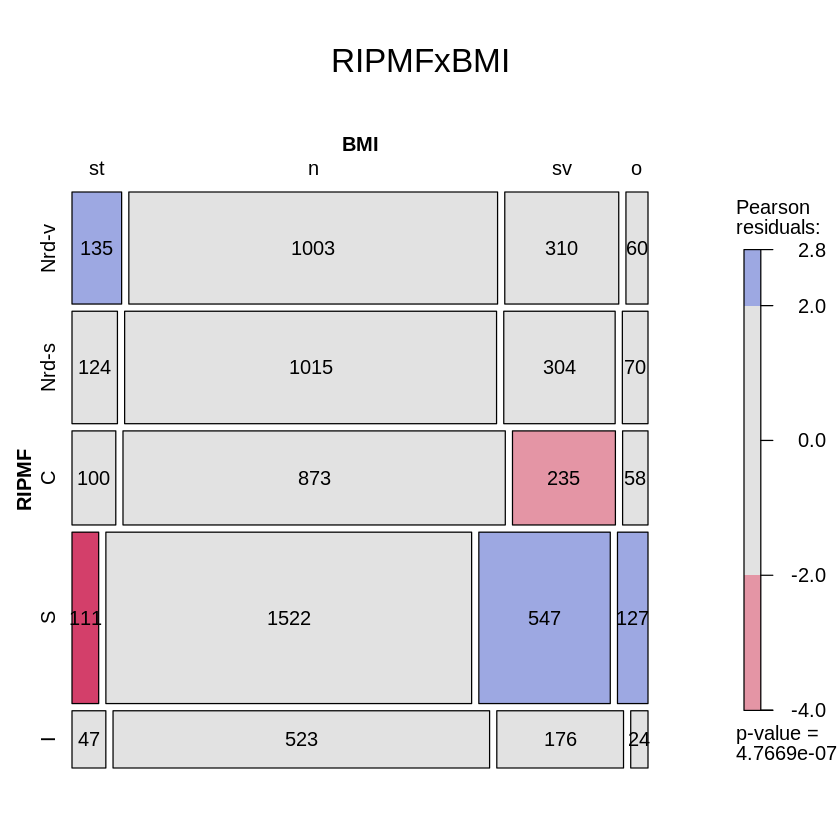

In [ ]:
mosaic(~ RIPMF + BMI, data = AVQ18.sport, main = "RIPMFxBMI", shade = TRUE, legend = TRUE,abbreviate_labs = T, labeling = labeling_values)

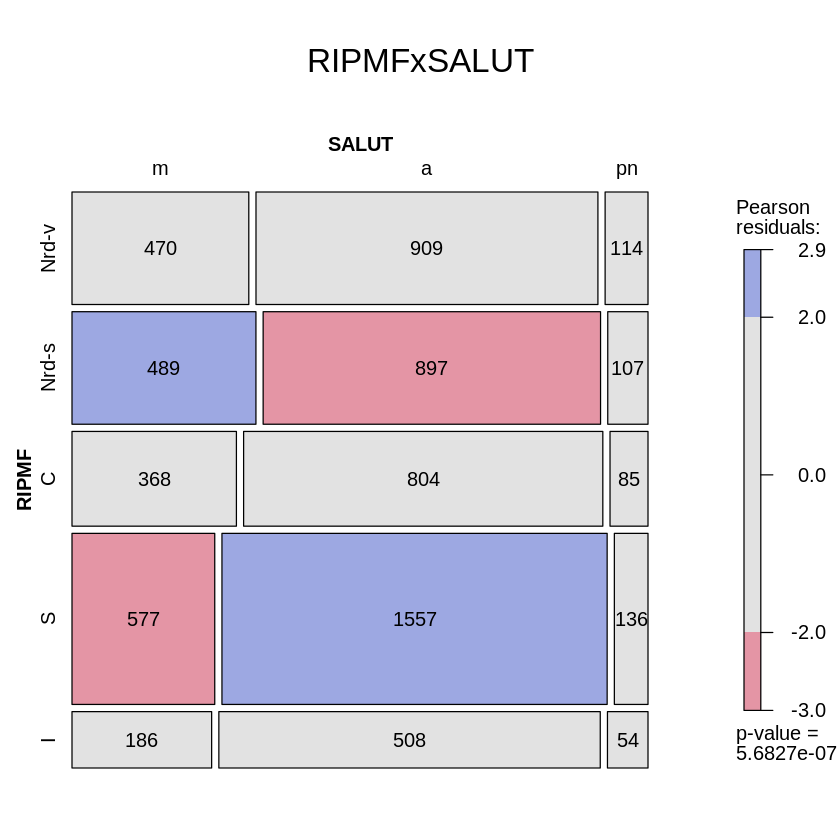

In [ ]:
mosaic(~ RIPMF + SALUT, data = AVQ18.sport, main = "RIPMFxSALUT", shade = TRUE, legend = TRUE,abbreviate_labs = T, labeling = labeling_values)

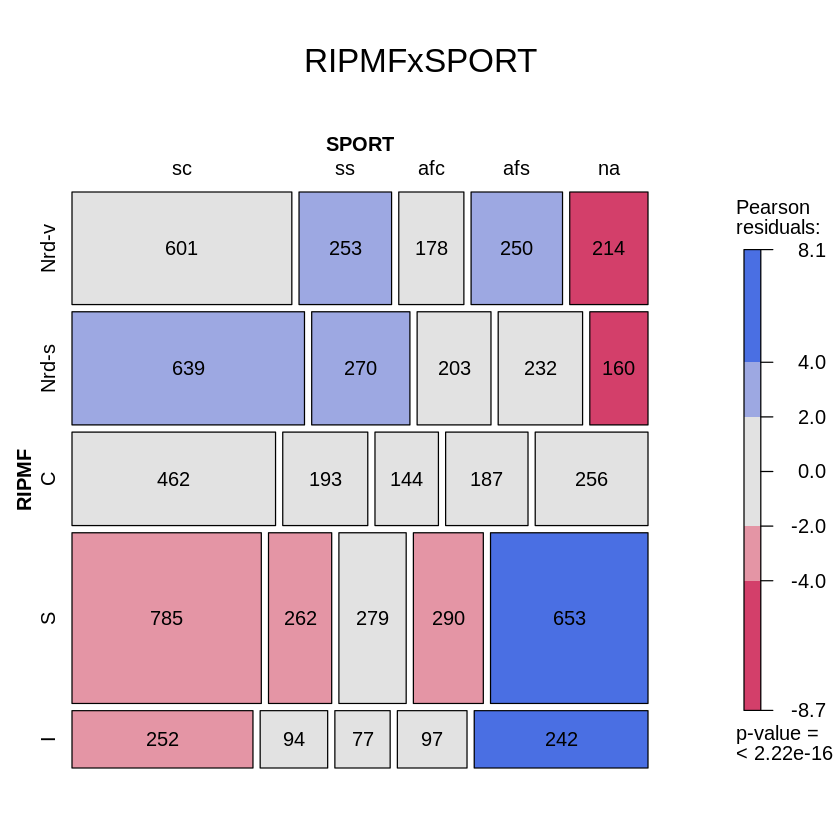

In [ ]:
mosaic(~ RIPMF + SPORT, data = AVQ18.sport, main = "RIPMFxSPORT", shade = TRUE, legend = TRUE,abbreviate_labs = T, labeling = labeling_values)

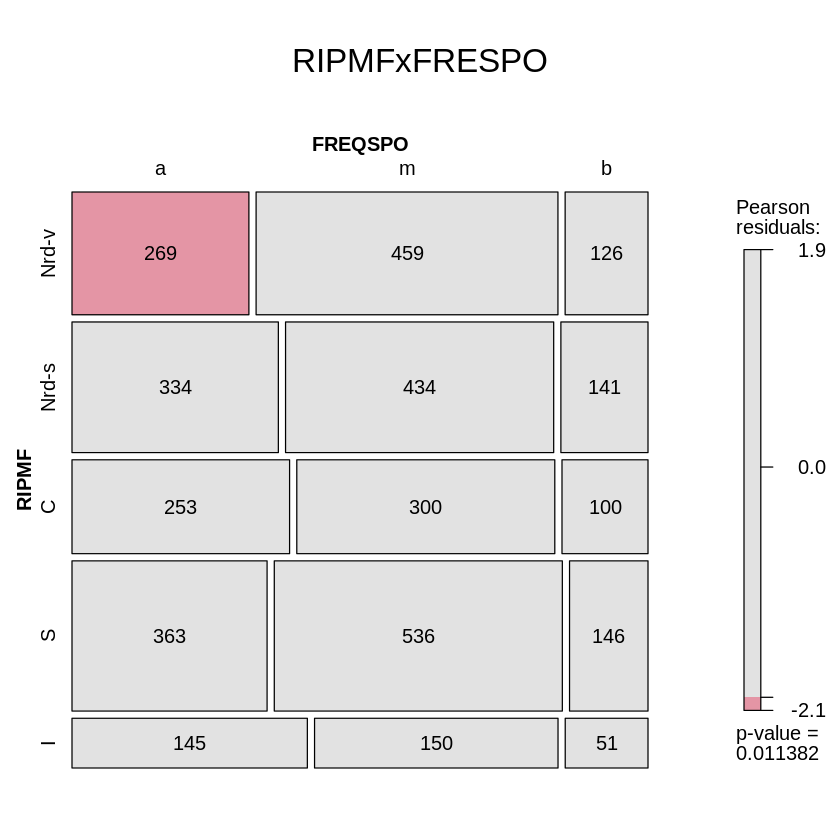

In [ ]:
mosaic(~ RIPMF + FREQSPO, data = AVQ18.sport, main = "RIPMFxFRESPO", shade = TRUE, legend = TRUE,abbreviate_labs = T, labeling = labeling_values)

#### Bivariata // Focus Risorse Economiche

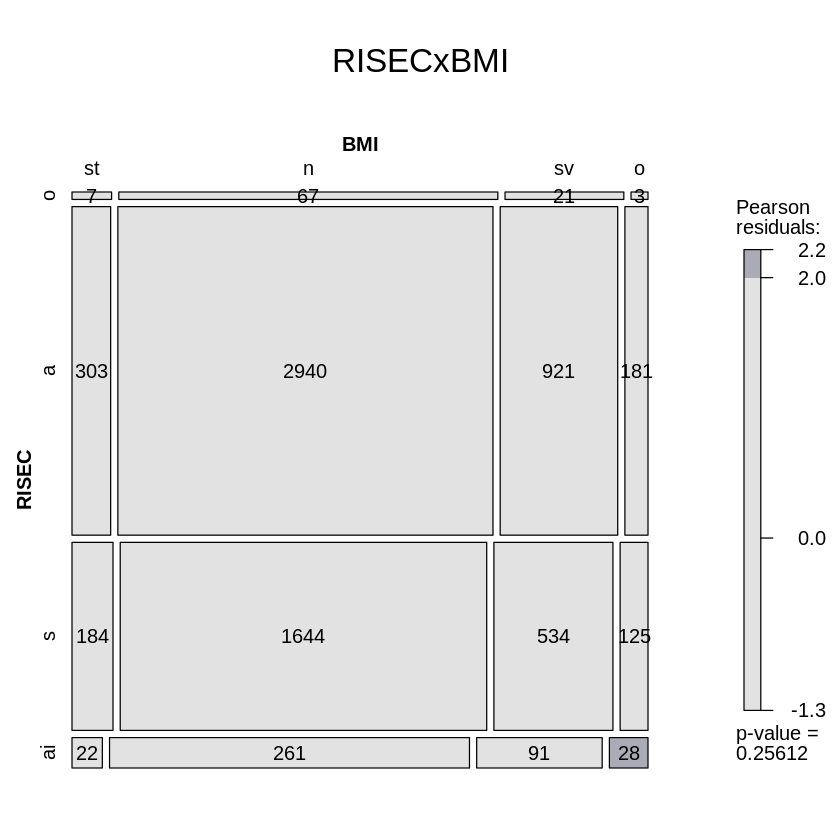

In [ ]:
mosaic(~ RISEC + BMI, data = AVQ18.sport, main = "RISECxBMI", shade = TRUE, legend = TRUE,abbreviate_labs = T, labeling = labeling_values)

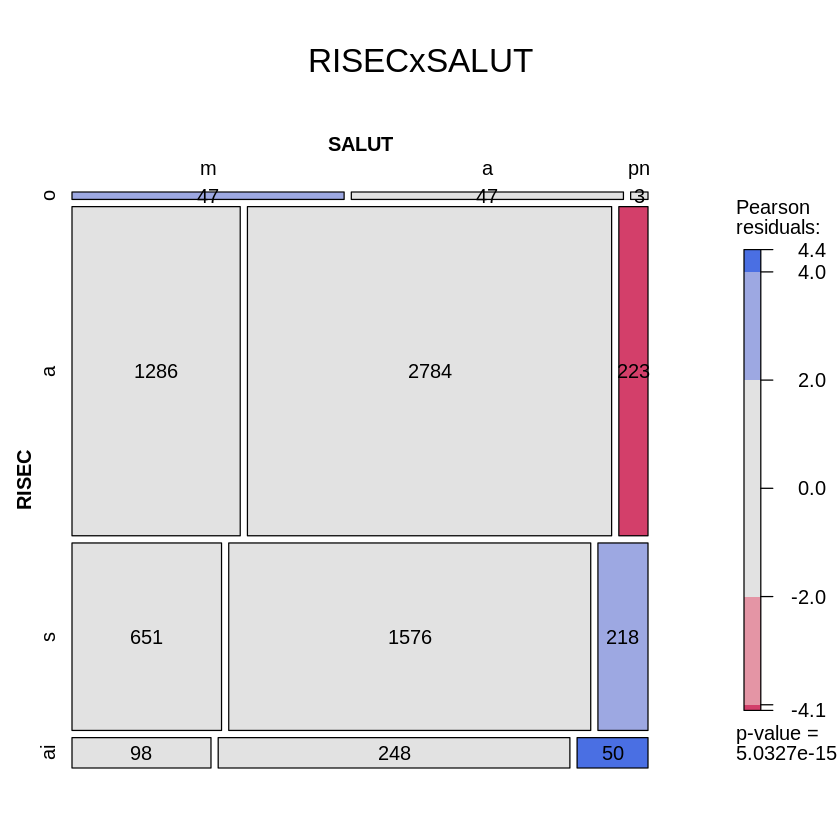

In [ ]:
mosaic(~ RISEC + SALUT, data = AVQ18.sport, main = "RISECxSALUT", shade = TRUE, legend = TRUE,abbreviate_labs = T, labeling = labeling_values)

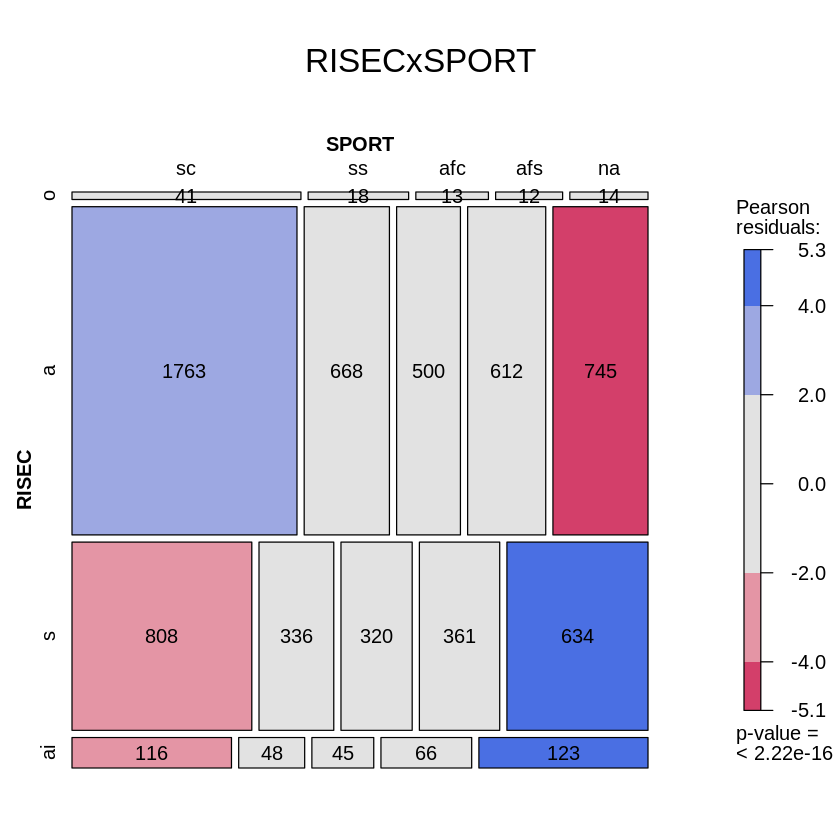

In [ ]:
mosaic(~ RISEC + SPORT, data = AVQ18.sport, main = "RISECxSPORT", shade = TRUE, legend = TRUE,abbreviate_labs = T, labeling = labeling_values)

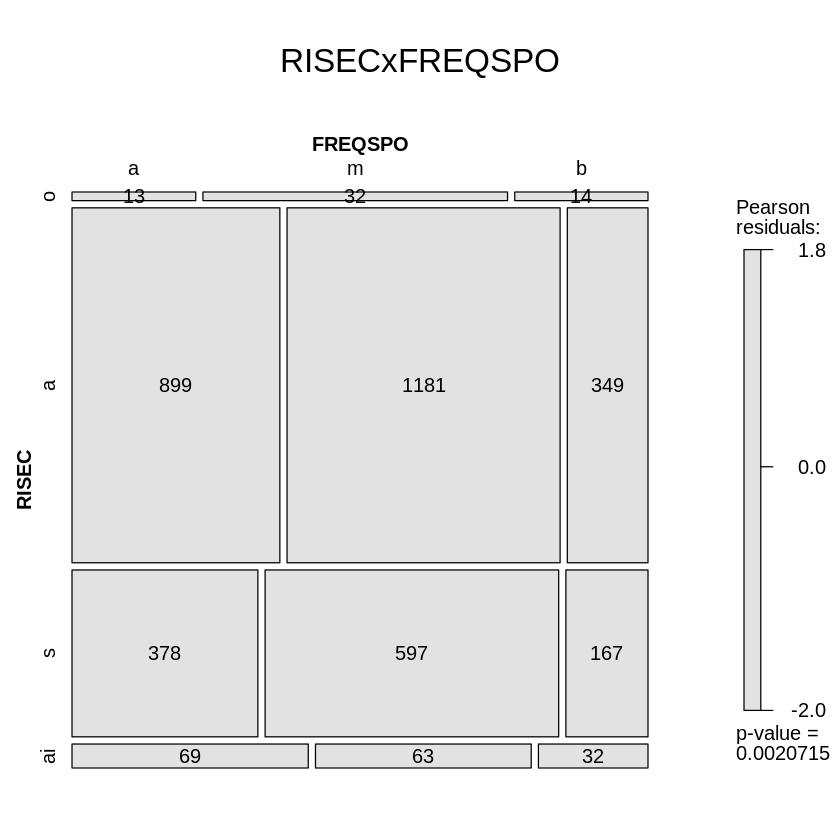

In [ ]:
mosaic(~ RISEC + FREQSPO, data = AVQ18.sport, main = "RISECxFREQSPO", shade = TRUE, legend = TRUE,abbreviate_labs = T, labeling = labeling_values)

#### Bivariata // Focus Istruzione

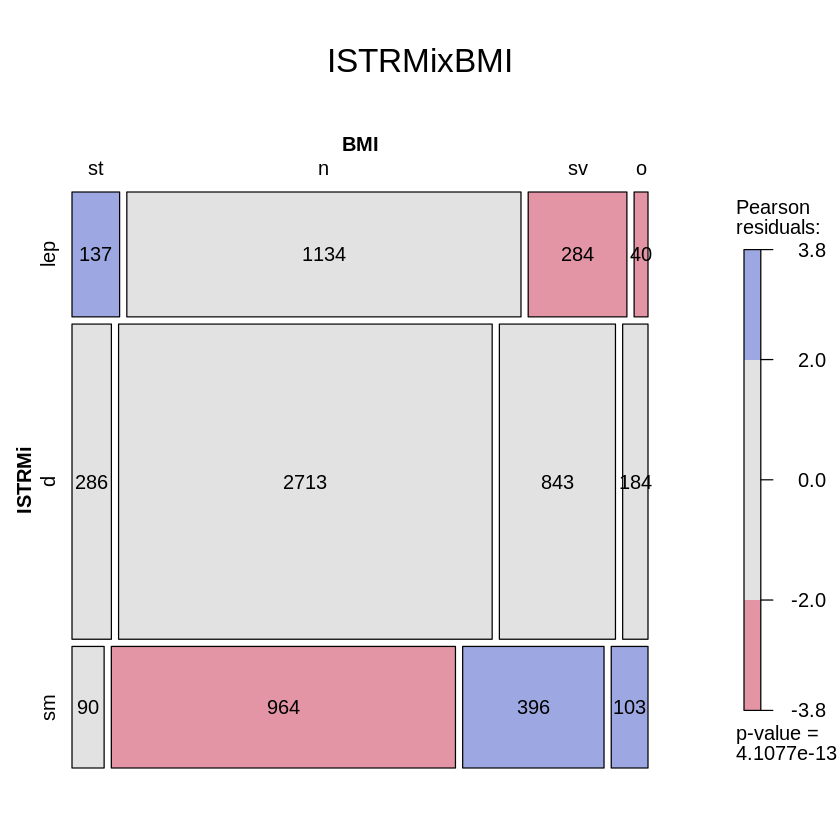

In [ ]:
mosaic(~ ISTRMi + BMI, data = AVQ18.sport, main = "ISTRMixBMI", shade = TRUE, legend = TRUE,abbreviate_labs = T, labeling = labeling_values)

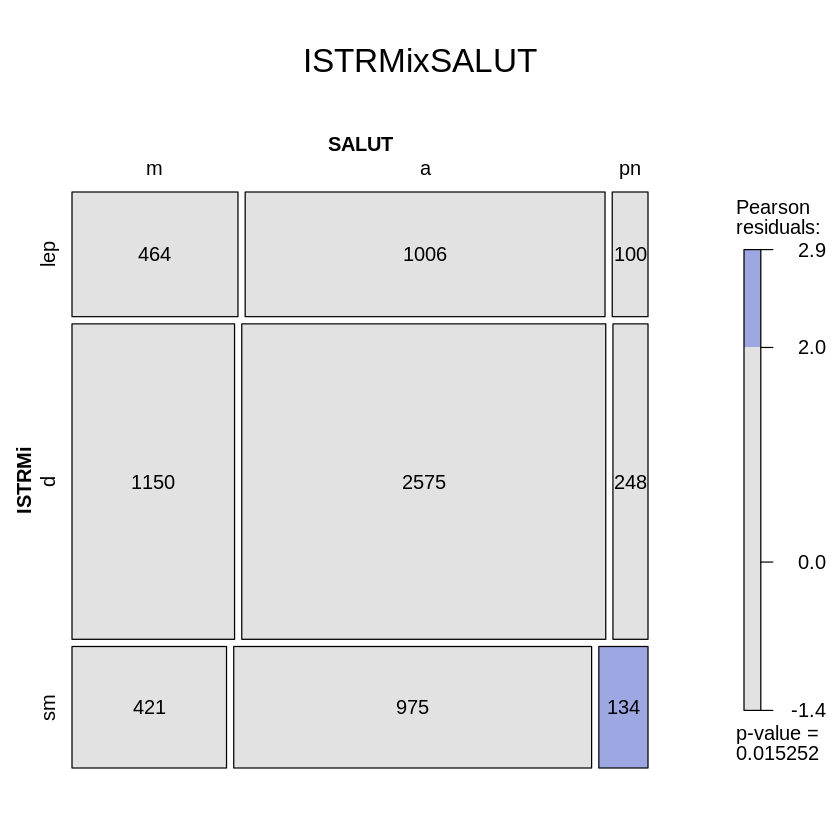

In [ ]:
mosaic(~ ISTRMi + SALUT, data = AVQ18.sport, main = "ISTRMixSALUT", shade = TRUE, legend = TRUE,abbreviate_labs = T, labeling = labeling_values)

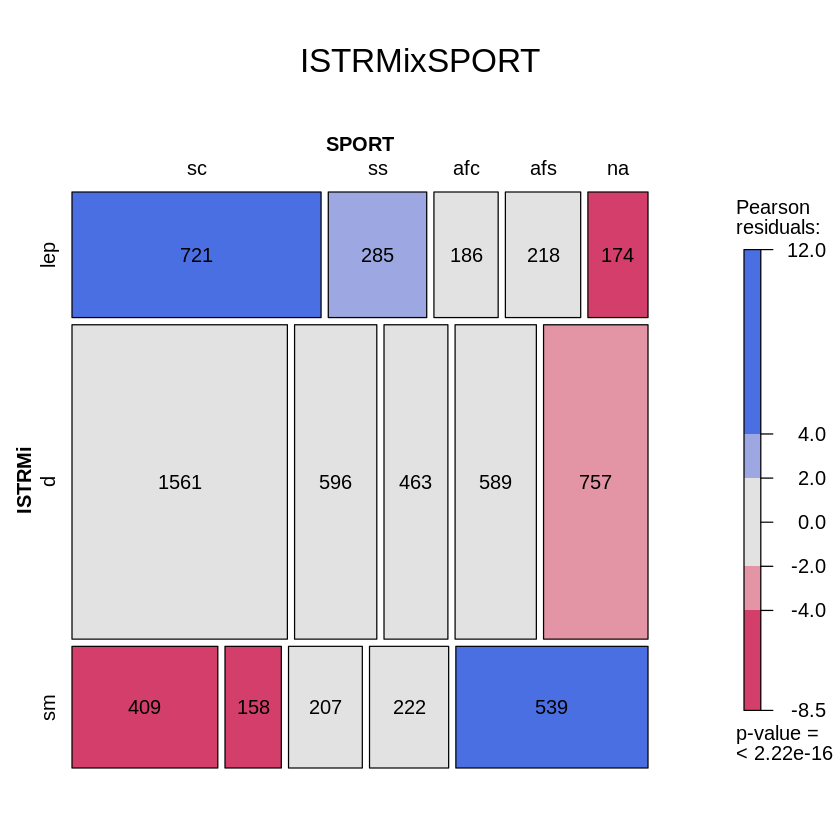

In [ ]:
mosaic(~ ISTRMi + SPORT, data = AVQ18.sport, main = "ISTRMixSPORT", shade = TRUE, legend = TRUE,abbreviate_labs = T, labeling = labeling_values)

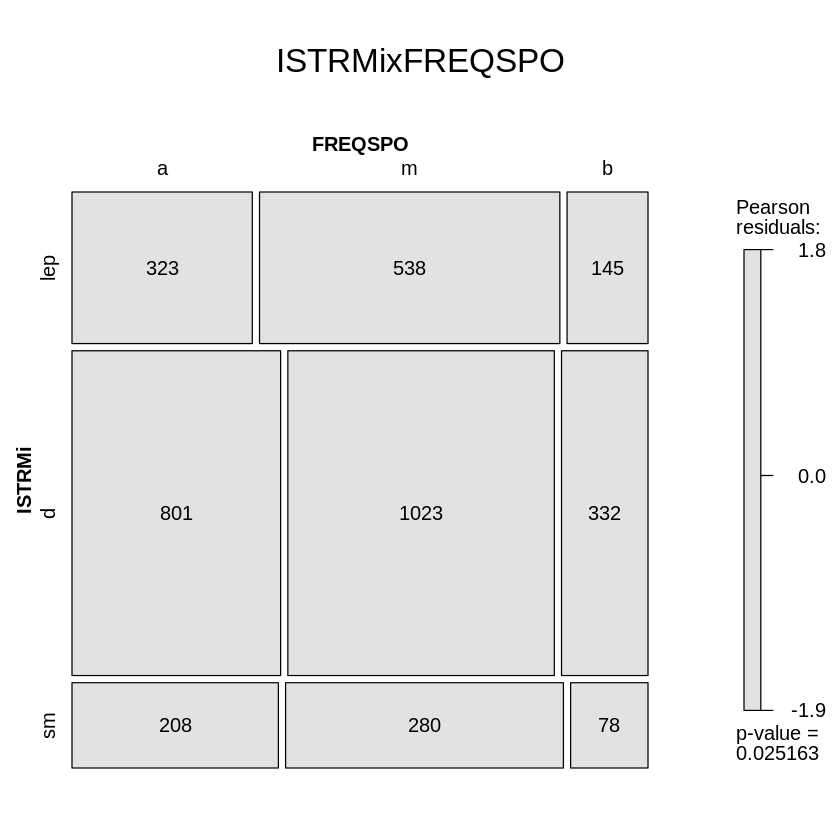

In [ ]:
mosaic(~ ISTRMi + FREQSPO, data = AVQ18.sport, main = "ISTRMixFREQSPO", shade = TRUE, legend = TRUE,abbreviate_labs = T, labeling = labeling_values)

#### Bivariata // Focus relazione tra variabili socio-economiche

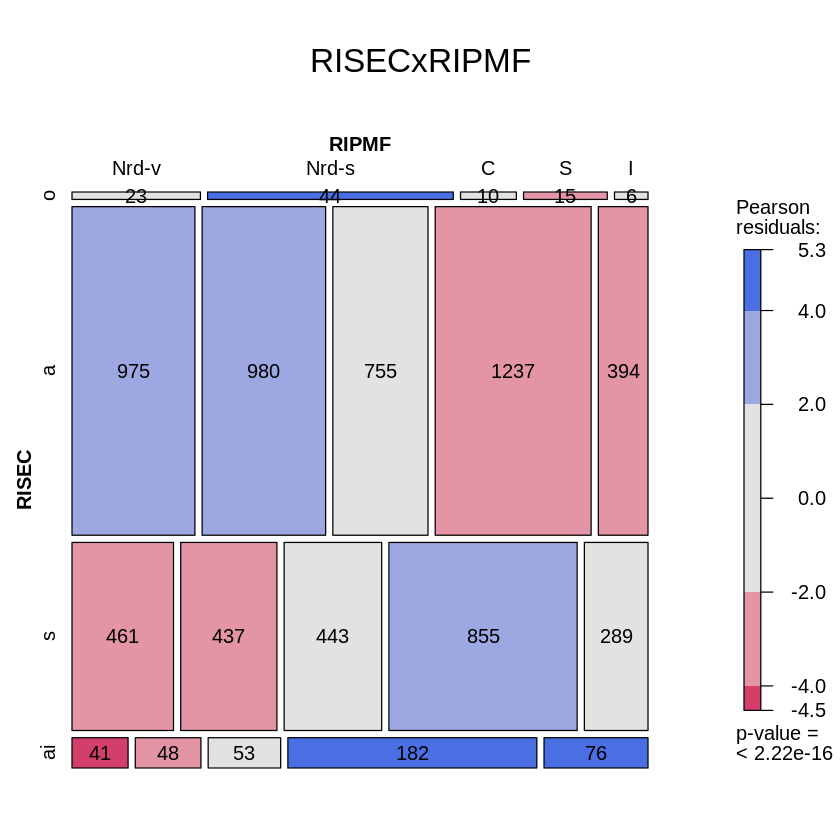

In [ ]:
mosaic(~ RISEC + RIPMF, data = AVQ18.sport, main = "RISECxRIPMF", shade = TRUE, legend = TRUE,abbreviate_labs = T, labeling = labeling_values)

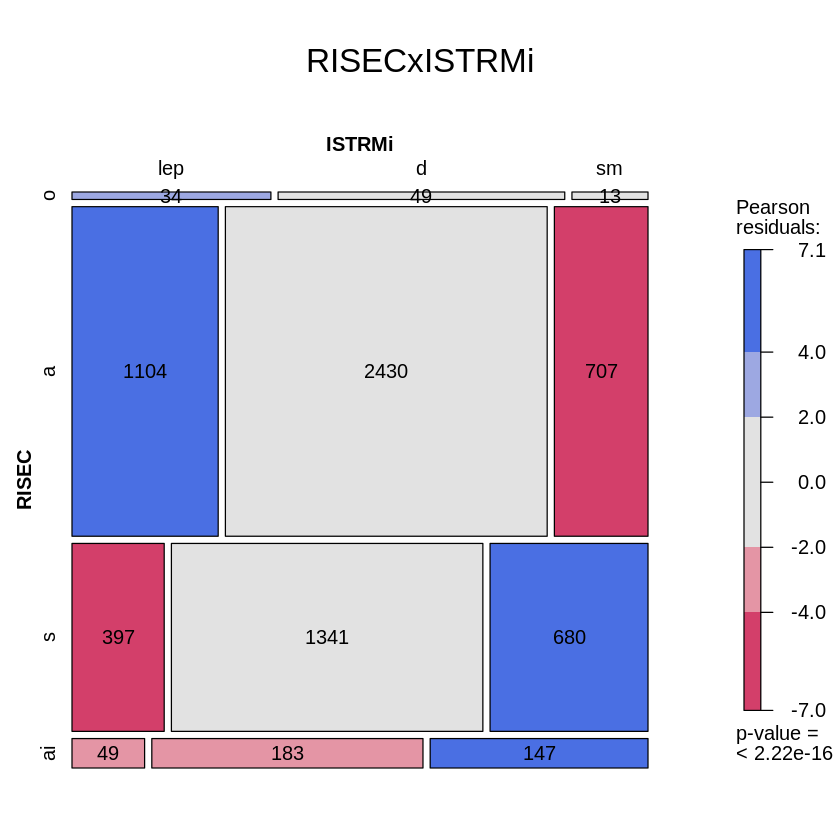

In [ ]:
mosaic(~ RISEC + ISTRMi, data = AVQ18.sport, main = "RISECxISTRMi", shade = TRUE, legend = TRUE,abbreviate_labs = T, labeling = labeling_values)

#### Bivariata // Focus Sesso

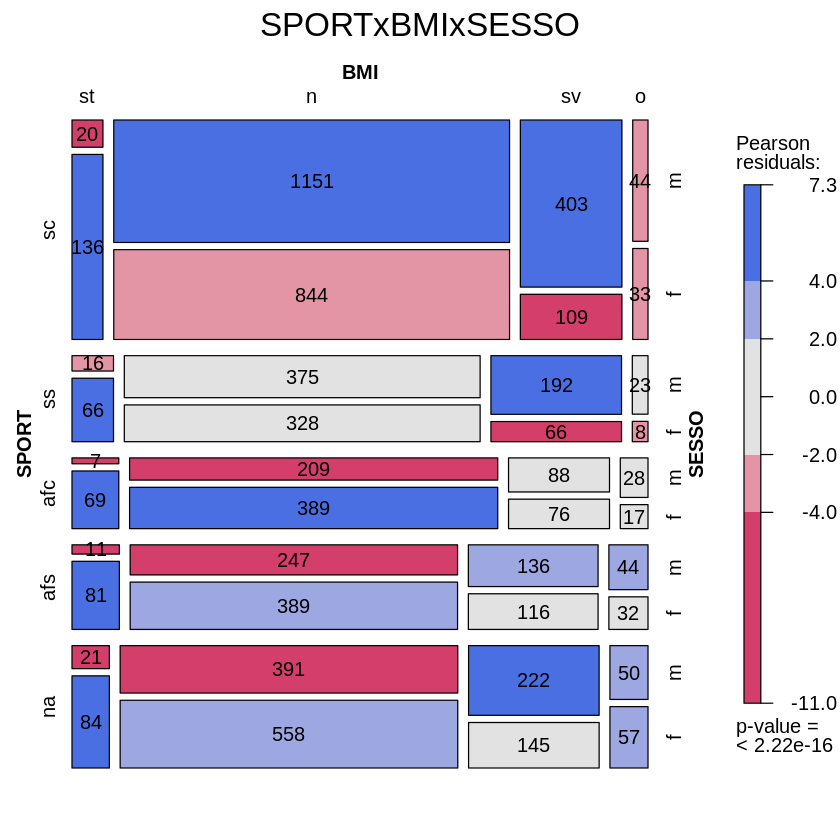

In [ ]:
mosaic(~ SPORT + BMI + SESSO, data = AVQ18.sport, main = "SPORTxBMIxSESSO", shade = TRUE, legend = TRUE,abbreviate_labs = T, labeling = labeling_values)

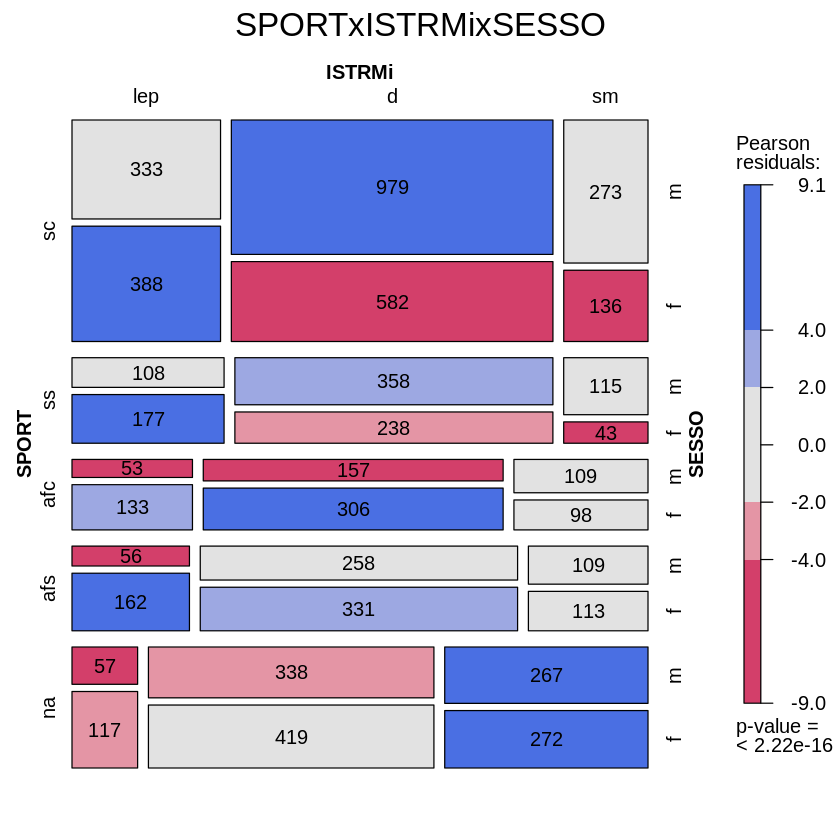

In [ ]:
mosaic(~ SPORT + ISTRMi + SESSO, data = AVQ18.sport, main = "SPORTxISTRMixSESSO", shade = TRUE, legend = TRUE,abbreviate_labs = T, labeling = labeling_values)

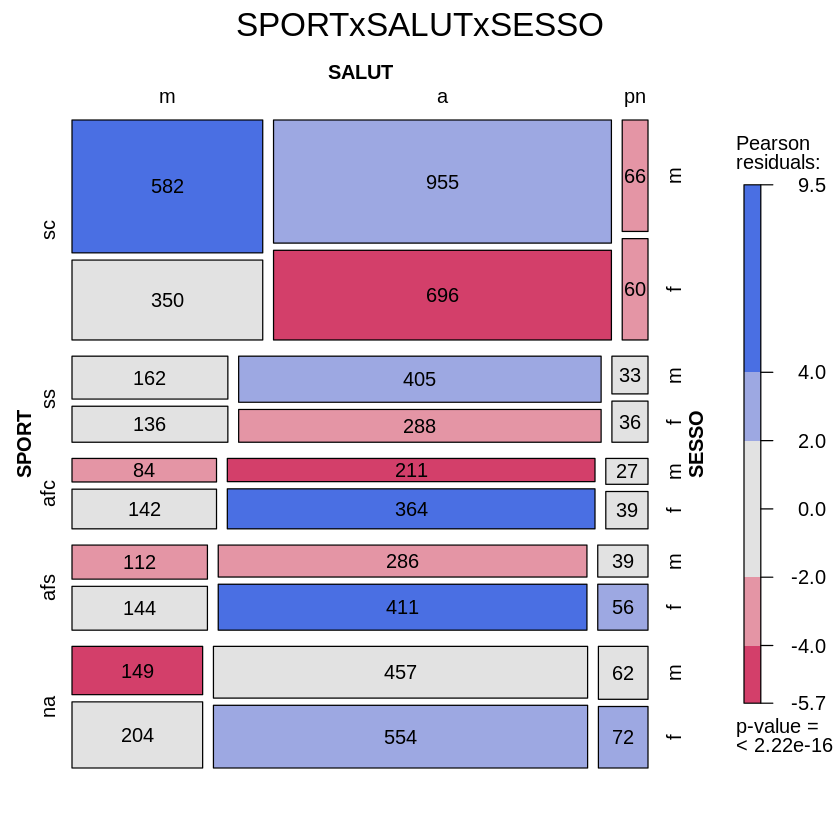

In [ ]:
mosaic(~ SPORT + SALUT + SESSO, data = AVQ18.sport, main = "SPORTxSALUTxSESSO", shade = TRUE, legend = TRUE,abbreviate_labs = T, labeling = labeling_values)

#### Analisi Multivariata // MCA

In [ ]:
library("FactoMineR")
library("factoextra")
library("ggplot2")

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [ ]:
ggmca <- function(df,title){
  df <- na.omit(df)
  cats = apply(df, 2, function(x) nlevels(as.factor(x)))
  mca1 = MCA(df, graph = FALSE)
  mca1_vars_df = data.frame(mca1$var$coord, Variable = rep(names(cats), cats))
  mca1_obs_df = data.frame(mca1$ind$coord)
  g <- ggplot(data = mca1_obs_df, aes(x = Dim.1, y = Dim.2))+
  geom_hline(yintercept = 0, colour = "gray70")+
  geom_vline(xintercept = 0, colour = "gray70")+
  geom_point(colour = "gray50", alpha = 0.0)+
  geom_density2d(colour = "gray80")+
  geom_text(data = mca1_vars_df,aes(x = Dim.1, y = Dim.2,label = rownames(mca1_vars_df), colour = Variable))+
  ggtitle(title)+
  scale_colour_discrete(name = "Variable")
  return(g)#return(list(g, mca1))
}

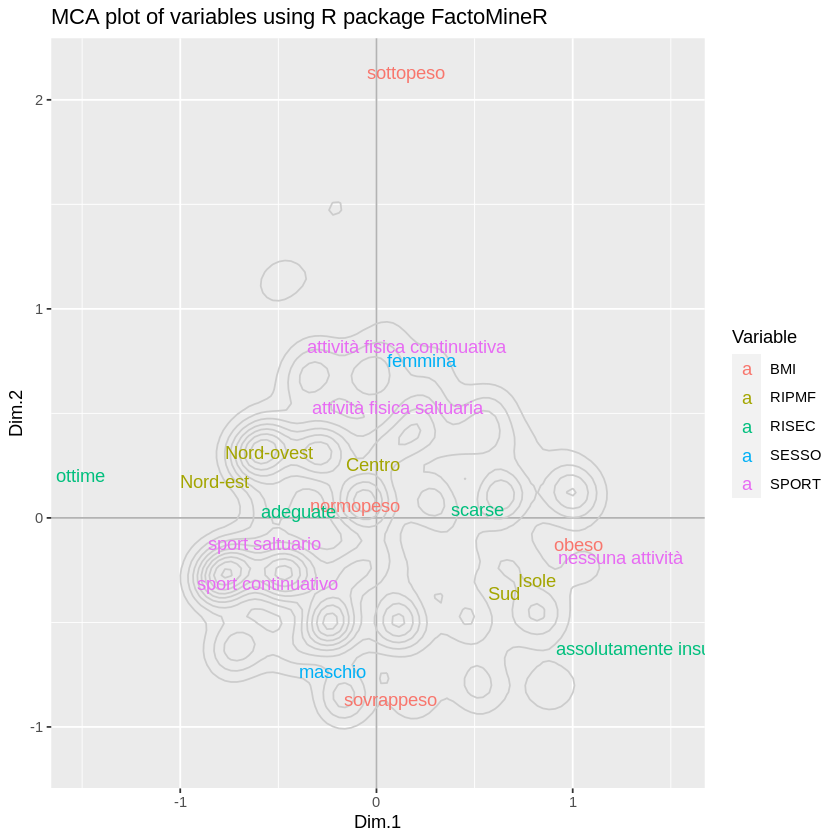

In [ ]:
ggmca(AVQ18.sport[,c('BMI','SPORT','RISEC','RIPMF','SESSO')],"MCA plot of variables using R package FactoMineR")

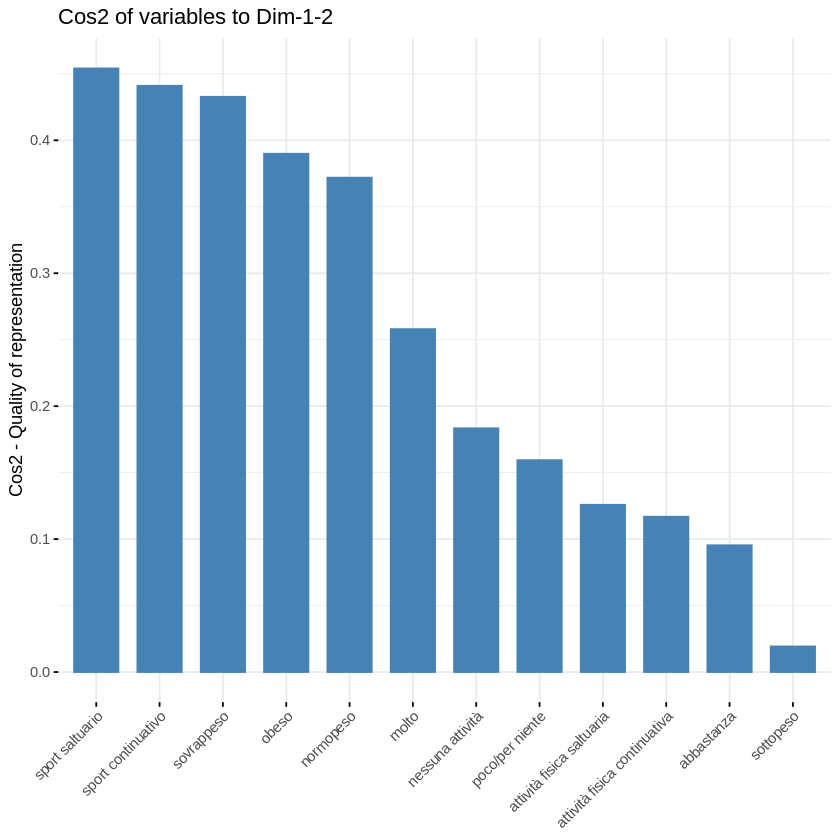

In [ ]:
fviz_cos2(mca1, choice = "var", axes = 1:2)

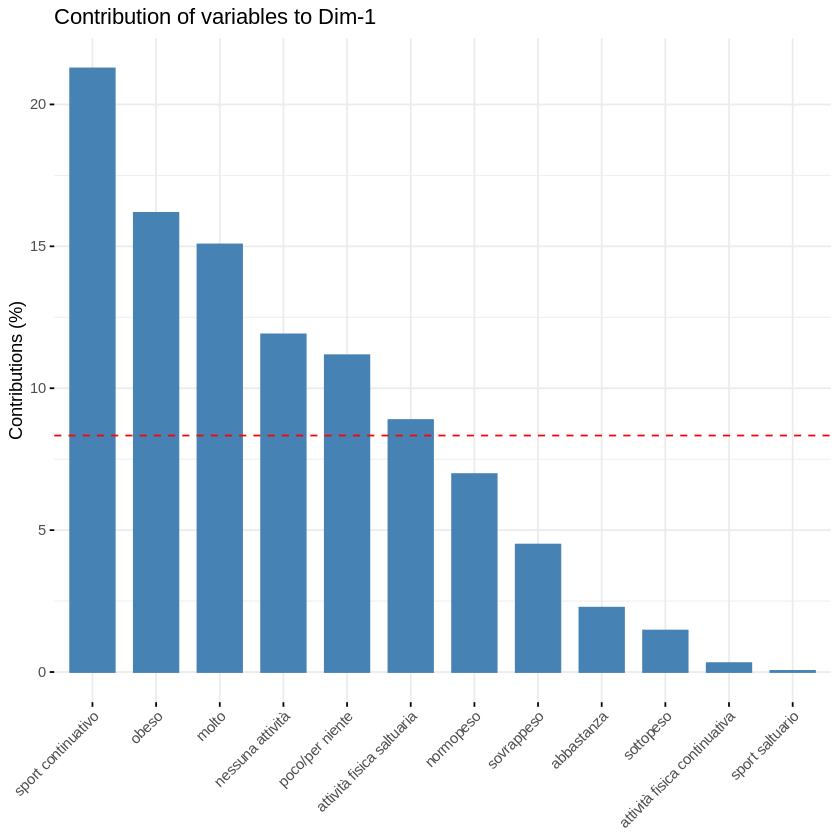

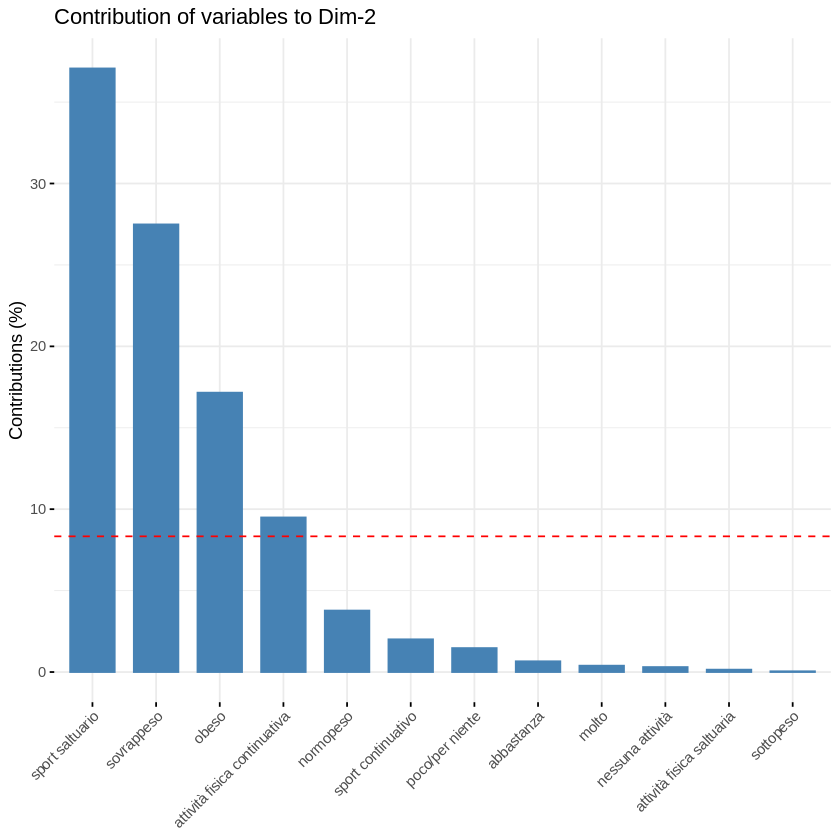

In [ ]:
# Contributions of rows to dimension 1
fviz_contrib(mca1, choice = "var", axes = 1, top = 15)
# Contributions of rows to dimension 2
fviz_contrib(mca1, choice = "var", axes = 2, top = 15)

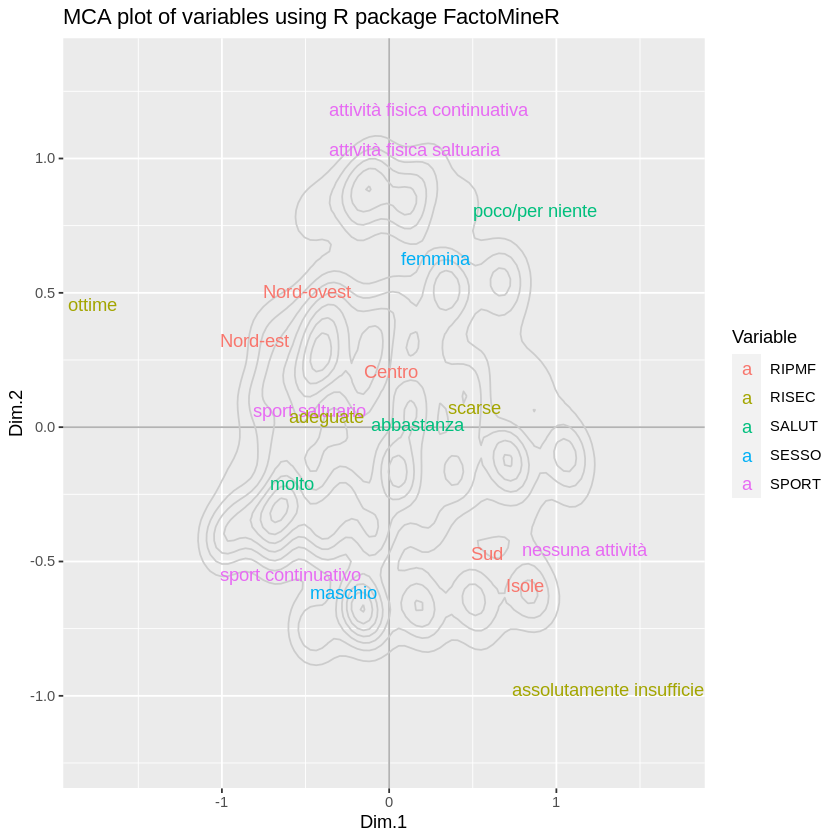

In [ ]:
ggmca(AVQ18.sport[,c('SALUT','SPORT','RISEC','RIPMF','SESSO')],"MCA plot of variables using R package FactoMineR")

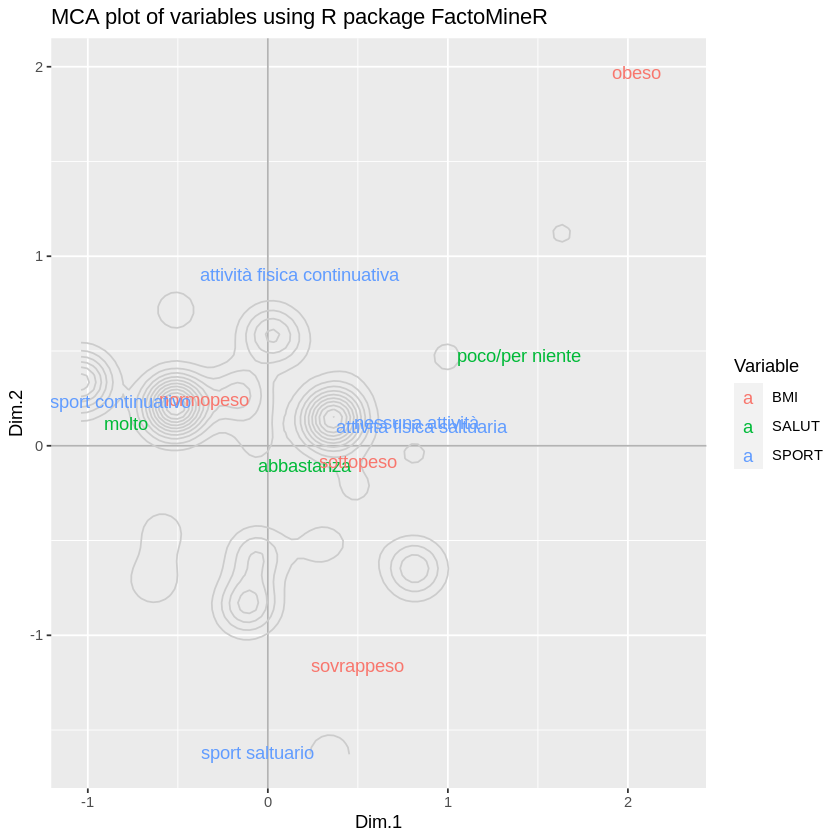

In [ ]:
ggmca(AVQ18.sport[,c('SALUT','BMI','SPORT')],"MCA plot of variables using R package FactoMineR")

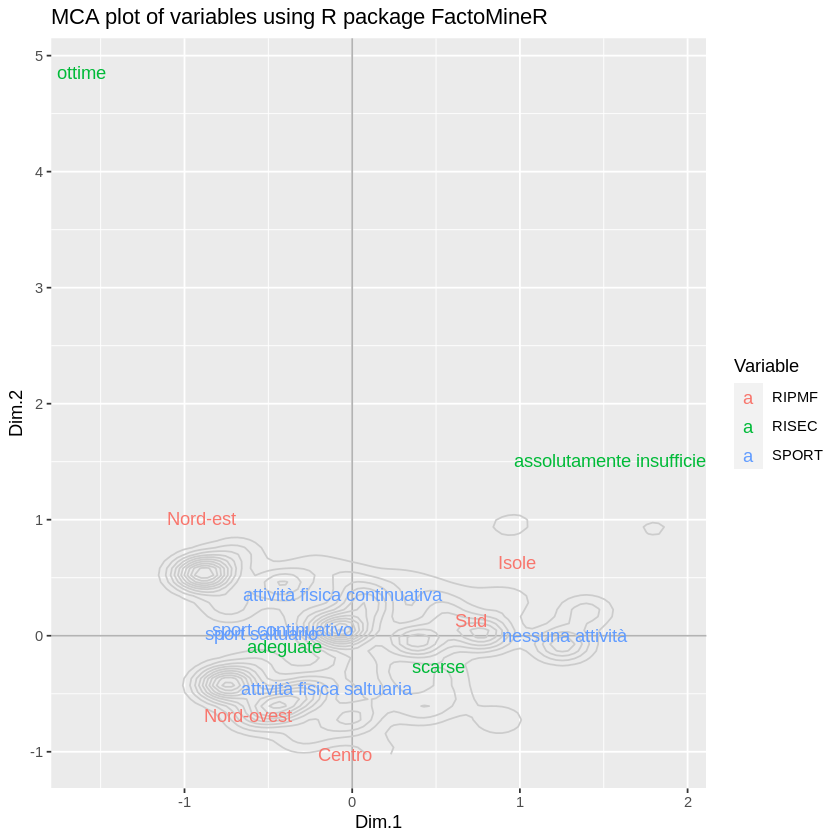

In [ ]:
ggmca(AVQ18.sport[,c('RISEC','SPORT','RIPMF')],"MCA plot of variables using R package FactoMineR")

In [ ]:
# Vedere con cos^2 la contribuzione alle singole dimensioni res.mca$var$cos2

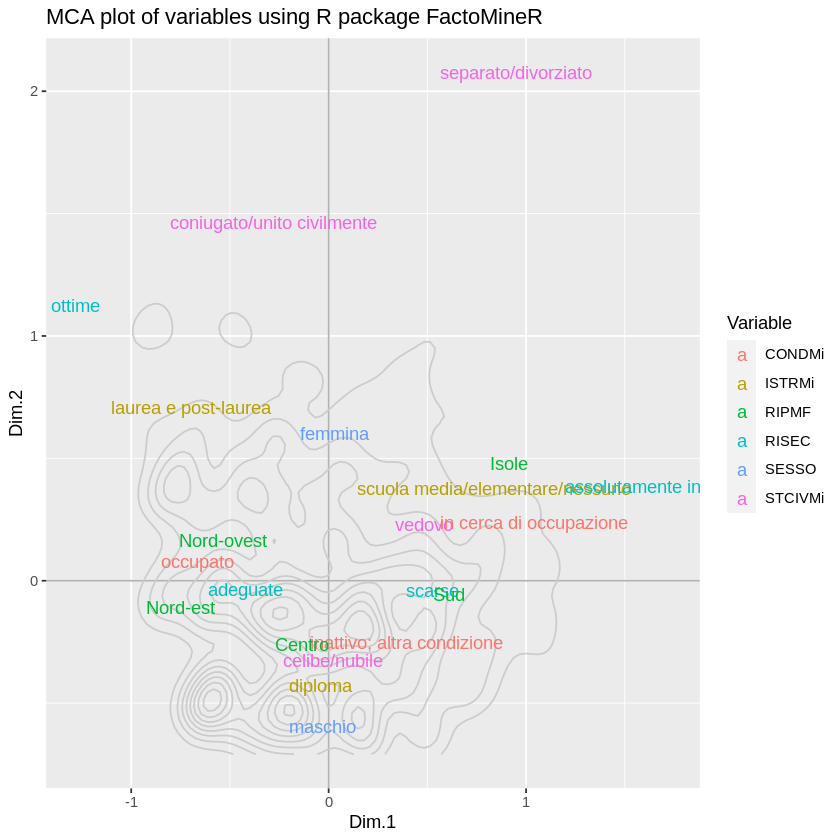

In [ ]:
ggmca(AVQ18.sport[,c('SESSO','STCIVMi','ISTRMi','CONDMi','RISEC', 'RIPMF')],"MCA plot of variables using R package FactoMineR")